In [1]:
import multiprocessing 
from multiprocessing import Process
from multiprocessing import Pool
import time

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

import astropy.coordinates as coord
import astropy.units as u

import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic, solarsystem, dimensionless


from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [64]:
tot_start_time = time.time()

### Considerar un par de órbitas en potencial NFW esférico, similar al asociado a la Vía Láctea.

In [65]:
tot_mass = 1.15e12*u.Msun
dm_halo = gp.NFWPotential(m=0.85*tot_mass, r_s=30.*u.kpc, units=galactic)

t_f = 10*u.Gyr
dt = 0.1*u.Myr

Text(0, 0.5, 'km / s')

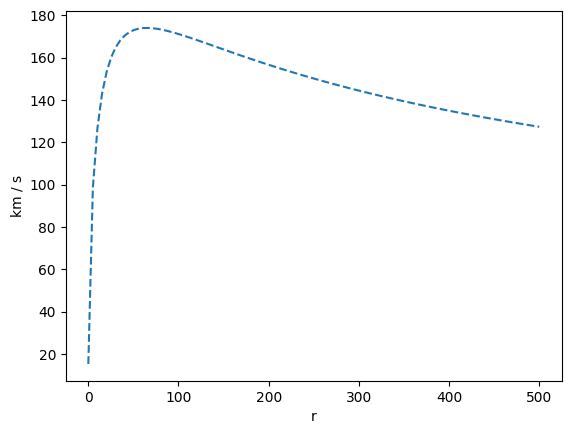

In [66]:
r_grid = np.linspace(0.1, 500, 100)
xyz = np.zeros((3,) + r_grid.shape)
xyz[0] = r_grid

v_dmHalo = dm_halo.circular_velocity(xyz)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r_grid, v_dmHalo, '--', label='DM Halo')
ax.set_xlabel('r')
ax.set_ylabel(v_dmHalo.unit)
#plt.legend()

In [67]:
w0 = gd.PhaseSpacePosition(pos=[30, 0, 0]*u.kpc, vel=[30, 20, 0]*u.km/u.s)
w1 = gd.PhaseSpacePosition(pos=[5, 3, 15]*u.kpc, vel=[70, 127, 10]*u.km/u.s)
w2 = gd.PhaseSpacePosition(pos=[100, 0,0]*u.kpc, vel=[0,171.19,0]*u.km/u.s)

orbit_0 = gp.Hamiltonian(dm_halo).integrate_orbit(w0, dt=dt, t1=0, t2=t_f)
orbit_1 = gp.Hamiltonian(dm_halo).integrate_orbit(w1, dt=dt, t1=0, t2=t_f)
orbit_2 = gp.Hamiltonian(dm_halo).integrate_orbit(w2, dt=dt, t1=0, t2=t_f)

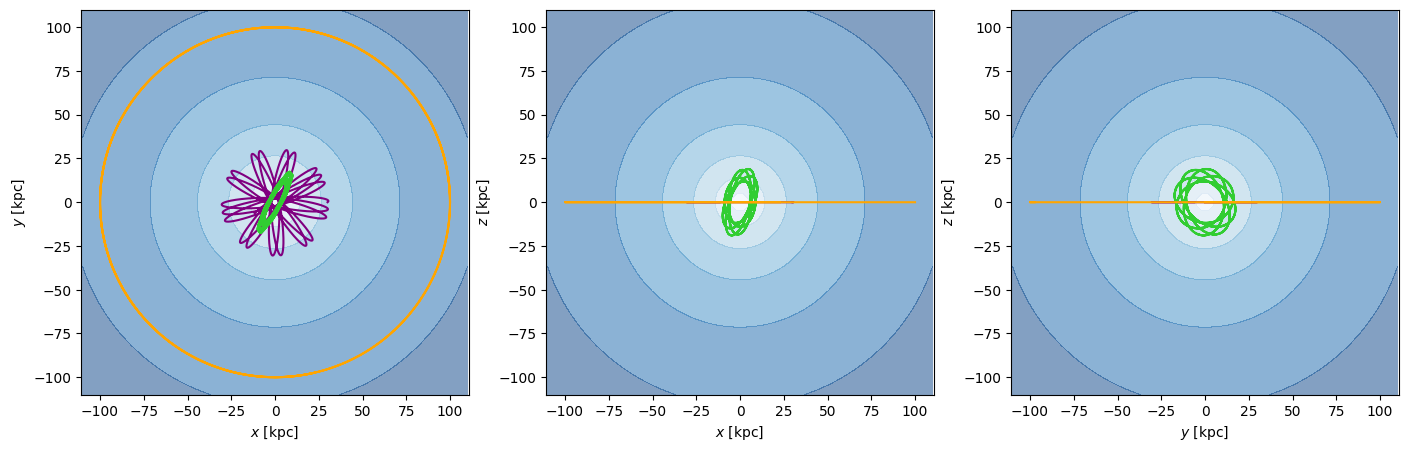

In [68]:
grid = np.linspace(-110,110,64)

fig,ax = plt.subplots(1, 3, figsize=(17,5))

dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'y'], color='purple', alpha=1.0, axes=[ax[0]]) 
orbit_1.plot(['x', 'y'], color='limegreen', alpha=1.0, axes=[ax[0]])
orbit_2.plot(['x', 'y'], color='orange', alpha=1.0, axes=[ax[0]]) 

dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'z'], color='purple', alpha=1.0, axes=[ax[1]]) 
orbit_1.plot(['x', 'z'], color='limegreen', alpha=1.0, axes=[ax[1]])
orbit_2.plot(['x', 'z'], color='orange', alpha=1.0, axes=[ax[1]]) 

dm_halo.plot_contours(grid=(0, grid,grid), cmap='Blues', ax=ax[2], alpha=0.5, zorder=0)
orbit_0.plot(['y', 'z'], color='purple', alpha=1.0, axes=[ax[2]]) 
orbit_1.plot(['y', 'z'], color='limegreen', alpha=1.0, axes=[ax[2]])
orbit_2.plot(['y', 'z'], color='orange', alpha=1.0, axes=[ax[2]]) 

plt.show()

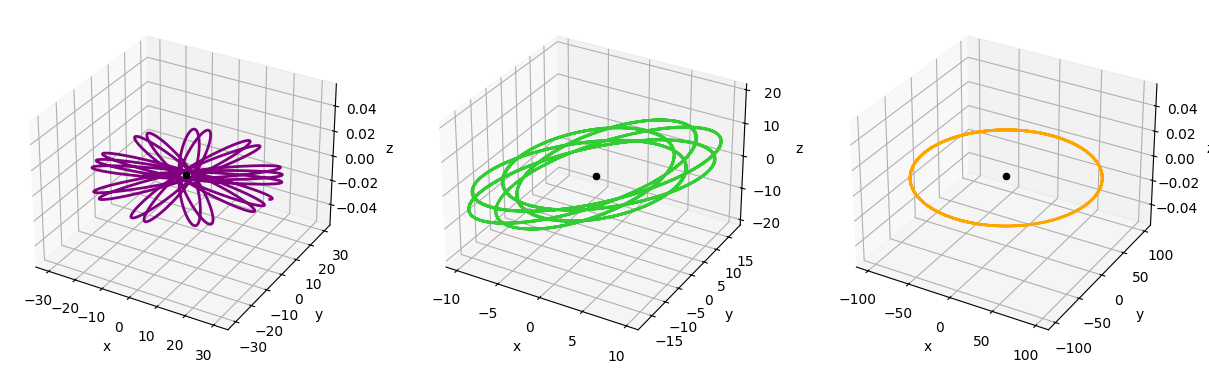

In [69]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1,3)
colors = ['purple', 'limegreen', 'orange']

for i, (orbit_data, color) in enumerate(zip([orbit_0, orbit_1, orbit_2], colors), start=1):
    ax = fig.add_subplot(gs[i - 1], projection='3d')
    ax.plot(orbit_data.x, orbit_data.y, orbit_data.z, c=color, lw=2)
    ax.scatter(0, 0, 0, color='black', label='Centro galactico')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

Text(0, 0.5, 'r [kpc] ')

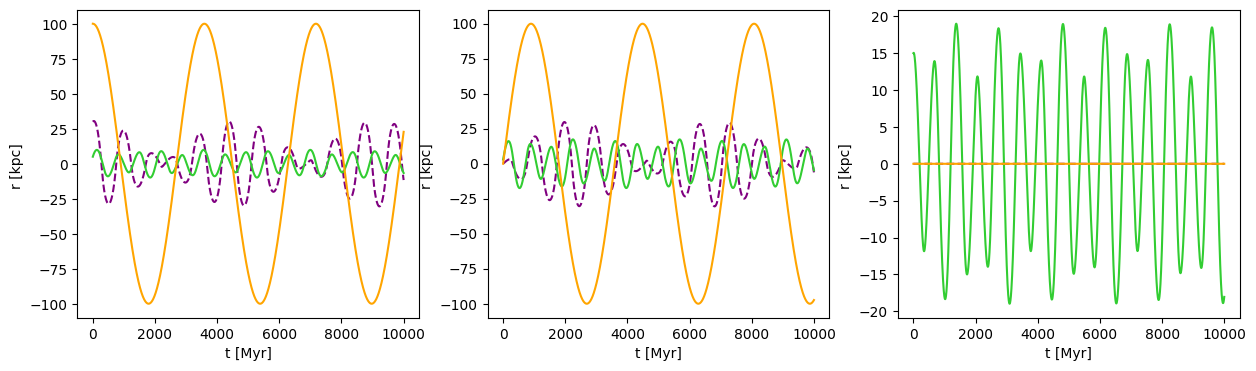

In [70]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))

ax0.plot(orbit_0.t, orbit_0.x, c='purple', ls='--')
ax0.plot(orbit_1.t, orbit_1.x, c='limegreen')
ax0.plot(orbit_2.t, orbit_2.x, c='orange')
ax0.set_xlabel('t [Myr]')
ax0.set_ylabel('r [kpc] ')

ax1.plot(orbit_0.t, orbit_0.y, c='purple', ls='--')
ax1.plot(orbit_1.t, orbit_1.y, c='limegreen')
ax1.plot(orbit_2.t, orbit_2.y, c='orange')
ax1.set_xlabel('t [Myr]')
ax1.set_ylabel('r [kpc] ')

ax2.plot(orbit_0.t, orbit_0.z, c='purple', ls='--')
ax2.plot(orbit_1.t, orbit_1.z, c='limegreen')
ax2.plot(orbit_2.t, orbit_2.z, c='orange')
ax2.set_xlabel('t [Myr]')
ax2.set_ylabel('r [kpc] ')

### Definir un volumen bien pequeño en el espacio de las fases

In [71]:
## 1e-5 hasta donde puede ir, pero usar tambien un 5-sigma de la orbita, 1 km/s sigma
norbits = 100

n_pos0 = np.random.normal(w0.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel0 = np.random.normal(w0.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s
n_pos1 = np.random.normal(w1.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel1 = np.random.normal(w1.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s
n_pos2 = np.random.normal(w2.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel2 = np.random.normal(w2.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s

n_w0 = gd.PhaseSpacePosition(pos=n_pos0, vel=n_vel0)
n_w1 = gd.PhaseSpacePosition(pos=n_pos1, vel=n_vel1)
n_w2 = gd.PhaseSpacePosition(pos=n_pos2, vel=n_vel2)

## Lo ideal seria hacer el mismo enjambre y usarlo para 2 orbitas distintias, pero estadisticamente, los 2 enjambres son lo mismo
#n_pos1 = np.random.normal(w0.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
#n_vel1 = np.random.normal(w0.vel.d_xyz.value, 1e-5, size=(norbits,3)).T * u.km/u.s

Text(0, 0.5, 'v(z) [km/s]')

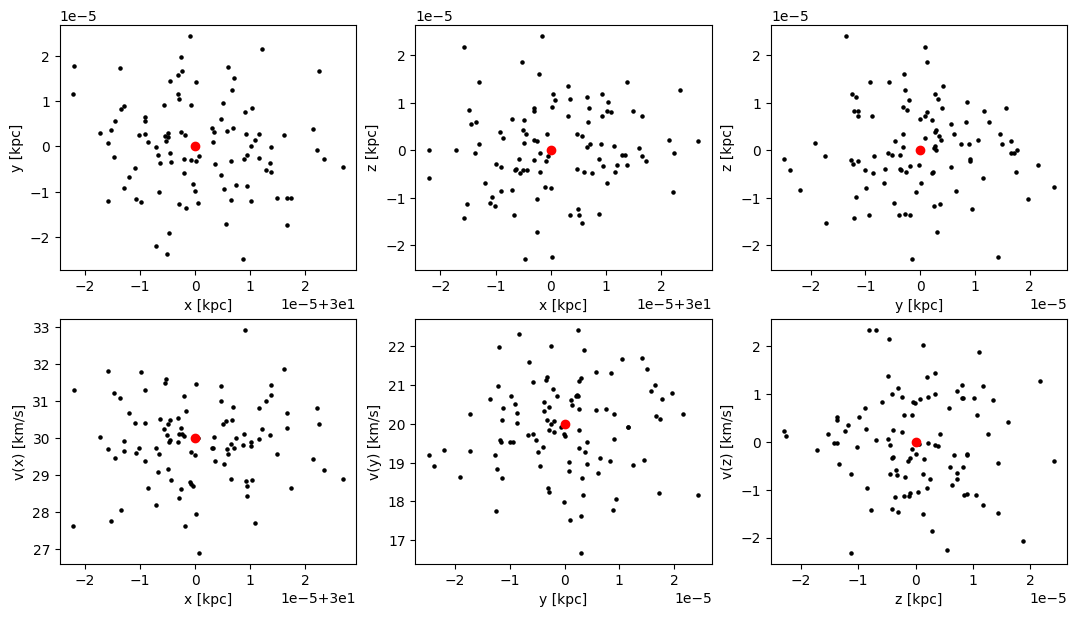

In [72]:
#Plot xy, xz, yz del enjambre
#n_w0.plot(color='black')
#plt.show()

fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(13, 7))

ax0.scatter(n_w0.x, n_w0.y,c='black', s=5)
ax0.scatter(w0.x, w0.y, c='red')
ax0.set_xlabel('x [kpc]')
ax0.set_ylabel('y [kpc]')

ax1.scatter(n_w0.x, n_w0.z,c='black', s=5)
ax1.scatter(w0.x, w0.z, c='red')
ax1.set_xlabel('x [kpc]')
ax1.set_ylabel('z [kpc]')

ax2.scatter(n_w0.y, n_w0.z,c='black', s=5)
ax2.scatter(w0.y, w0.z, c='red')
ax2.set_xlabel('y [kpc]')
ax2.set_ylabel('z [kpc]')

ax3.scatter(n_w0.x, n_w0.v_x,c='black', s=5)
ax3.scatter(w0.x, w0.v_x, c='red')
ax3.set_xlabel('x [kpc]')
ax3.set_ylabel('v(x) [km/s]')

ax4.scatter(n_w0.y, n_w0.v_y,c='black', s=5)
ax4.scatter(w0.y, w0.v_y, c='red')
ax4.set_xlabel('y [kpc]')
ax4.set_ylabel('v(y) [km/s]')

ax5.scatter(n_w0.z, n_w0.v_z,c='black', s=5)
ax5.scatter(w0.z, w0.v_z, c='red')
ax5.set_xlabel('z [kpc]')
ax5.set_ylabel('v(z) [km/s]')

### Integrar orbitas

In [73]:
print("Number of CPU cores available:", multiprocessing.cpu_count())

Number of CPU cores available: 8


In [74]:
def integrate_orbit_with_units(n_w, dt, t1, t2):
    dt_ = dt * u.Myr
    t1 = t1 * u.Gyr
    t2 = t2 * u.Gyr
    return dm_halo.integrate_orbit(n_w, dt=dt_, t1=t1, t2=t2)

In [75]:
if __name__ == "__main__":
    with Pool(5) as p:
        start_time = time.time()
        orbit_0n = p.apply(integrate_orbit_with_units, args=(n_w0, 0.5, 0, 10))
        orbit_1n = p.apply(integrate_orbit_with_units, args=(n_w1, 0.5, 0, 10))
        orbit_2n = p.apply(integrate_orbit_with_units, args=(n_w2, 0.5, 0, 10))
        p.close()
        p.join()
        print(time.time() - start_time)

5.721049785614014


Text(0, 0.5, 'z')

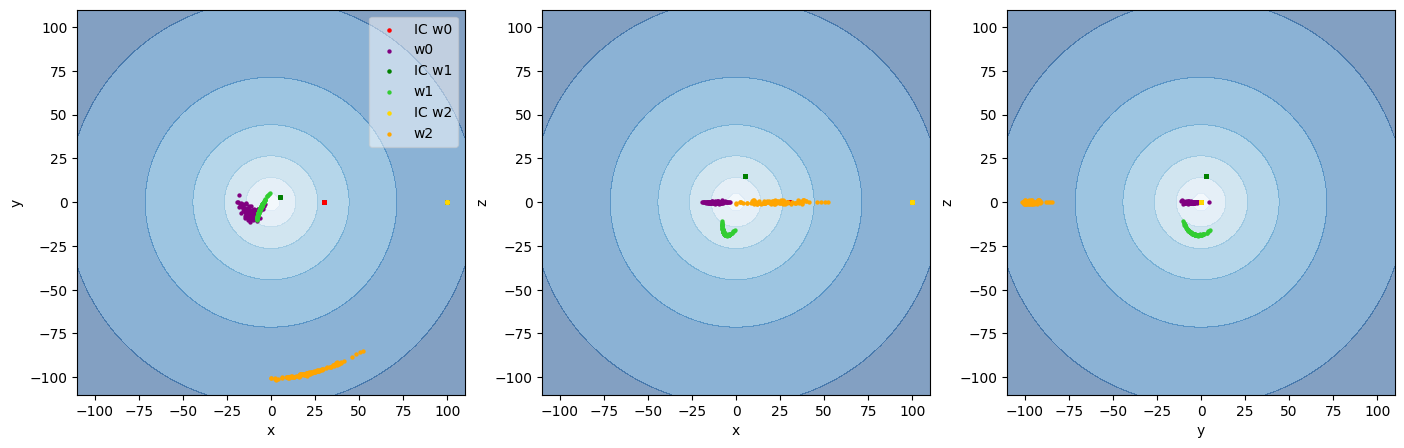

In [76]:
grid = np.linspace(-110,110,64)

fig, ax = plt.subplots(1,3, figsize=(17,5))

dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
ax[0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=5, label='IC w0')
ax[0].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.y[-1,:], c='purple', s=4.5, label='w0')
ax[0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=5, label='IC w1')
ax[0].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.y[-1,:], c='limegreen', s=4.5, label='w1')
ax[0].scatter(orbit_2n.pos.x[0,:], orbit_2n.pos.y[0,:], c='gold', s=5, label='IC w2')
ax[0].scatter(orbit_2n.pos.x[-1,:], orbit_2n.pos.y[-1,:], c='orange', s=4.5, label='w2')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(fancybox=True, framealpha=0.5)

dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
ax[1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[1].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[1].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[1].scatter(orbit_2n.pos.x[0,:], orbit_2n.pos.z[0,:], c='gold', s=6)
ax[1].scatter(orbit_2n.pos.x[-1,:], orbit_2n.pos.z[-1,:], c='orange', s=4.5)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')

dm_halo.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
ax[2].scatter(orbit_0n.pos.y[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[2].scatter(orbit_0n.pos.y[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[2].scatter(orbit_1n.pos.y[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[2].scatter(orbit_1n.pos.y[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[2].scatter(orbit_2n.pos.y[0,:], orbit_2n.pos.z[0,:], c='gold', s=6)
ax[2].scatter(orbit_2n.pos.y[-1,:], orbit_2n.pos.z[-1,:], c='orange', s=4.5)
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')

MovieWriter ffmpeg unavailable; using Pillow instead.


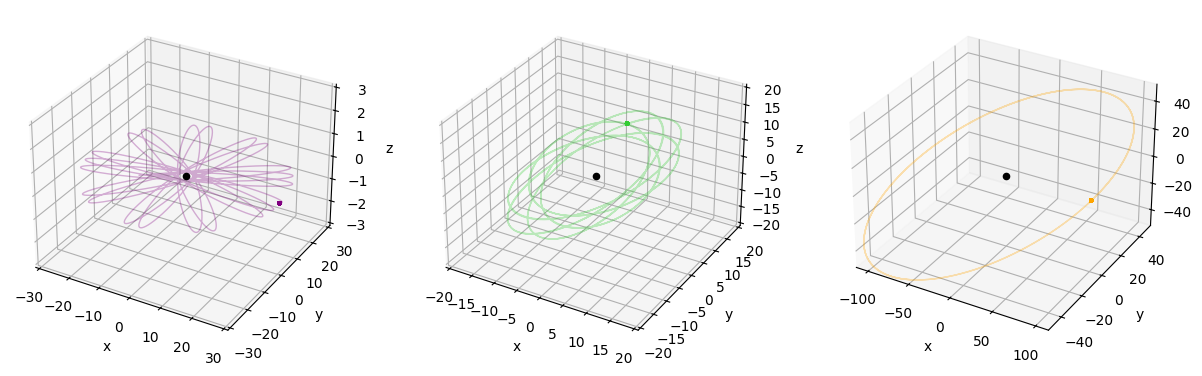

In [15]:
frames_ = np.arange(0, orbit_0n.t.shape[0], 100)
colors = ['purple', 'limegreen', 'orange']

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3)

# Definir los ejes utilizando el grid creado
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')

# Función de animación
def anim_ac(i):    
    for ax, orbit_data, color, orbit_ini in zip([ax1, ax2, ax3], [orbit_0n, orbit_1n, orbit_2n], colors, [orbit_0, orbit_1, orbit_2]):
        ax.clear()
        ax.plot(orbit_ini.x, orbit_ini.y, orbit_ini.z, c=color, lw=1, alpha=0.3)
        ax.scatter(orbit_data.pos.x[i, :], orbit_data.pos.y[i, :], orbit_data.pos.z[i, :], c=color, s=4.5)
        ax.scatter(0, 0, 0, color='black', label='Centro galactico')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax1.set_xlim(-30,30)
        ax1.set_ylim(-30,30)
        ax1.set_zlim(-3,3)
        ax2.set_xlim(-20,20)
        ax2.set_ylim(-20,20)
        ax2.set_zlim(-20,20)
        ax3.set_xlim(-110,110)
        ax3.set_ylim(-50,50)
        ax3.set_zlim(-50,50)
        
        

# Generar la animación
ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbits_3d.gif', fps=10)


MovieWriter ffmpeg unavailable; using Pillow instead.


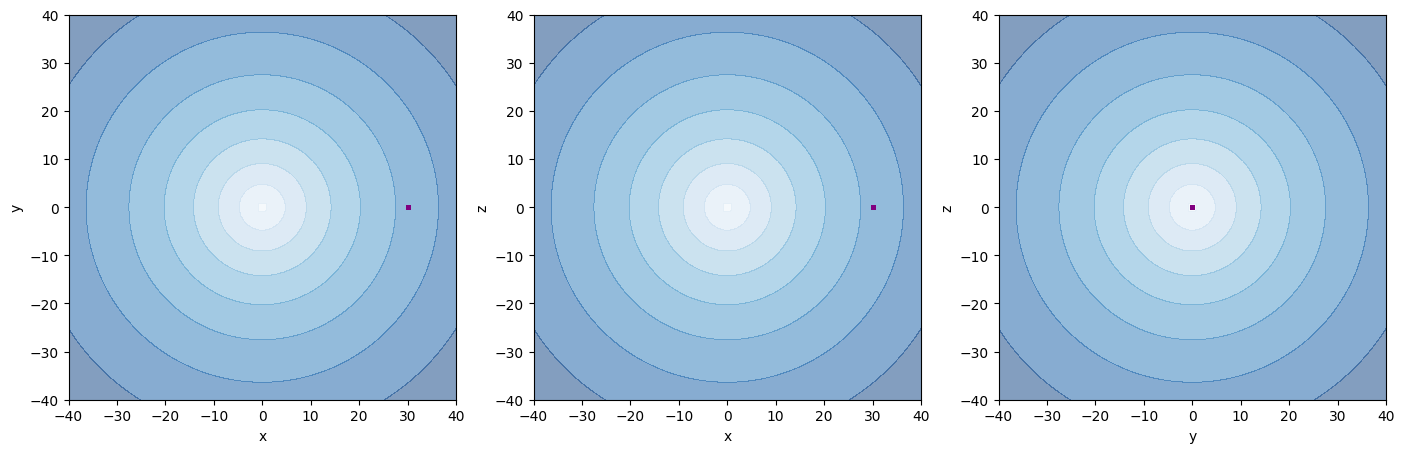

In [16]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_0n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.y[i,:], c='purple', s=4.5, label='w0')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    
    dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('z')
    
    dm_halo.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_0n.pos.y[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)
    ax[2].set_xlabel('y')
    ax[2].set_ylabel('z')

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_0.gif', fps=10)

MovieWriter ffmpeg unavailable; using Pillow instead.


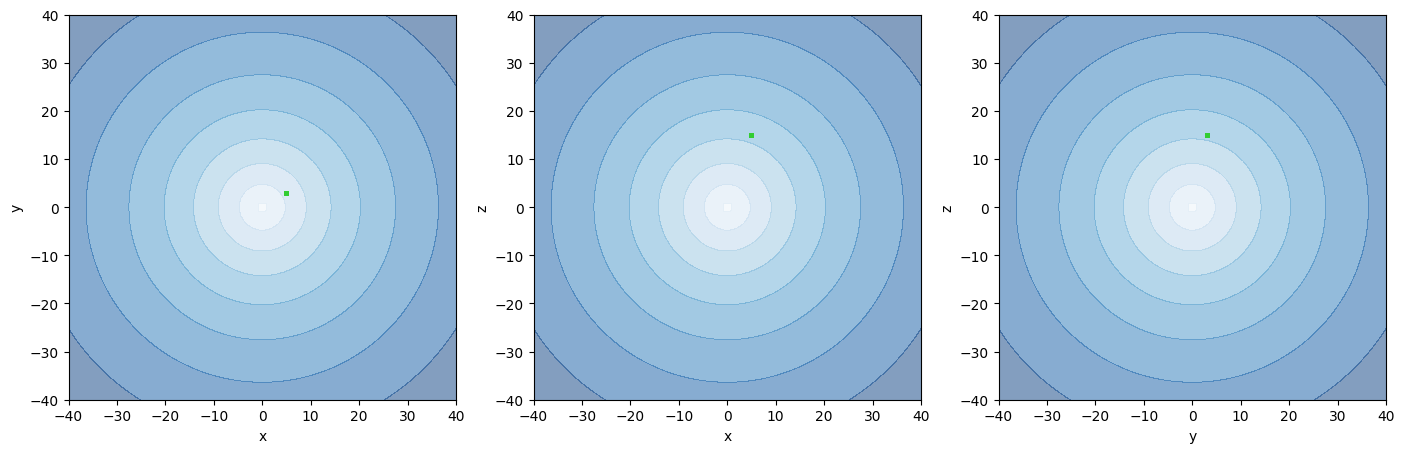

In [17]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_1n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.y[i,:], c='limegreen', s=4.5, label='w0')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    
    dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('z')
    
    dm_halo.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_1n.pos.y[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)
    ax[2].set_xlabel('y')
    ax[2].set_ylabel('z')
    
ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_1.gif', fps=10)

MovieWriter ffmpeg unavailable; using Pillow instead.


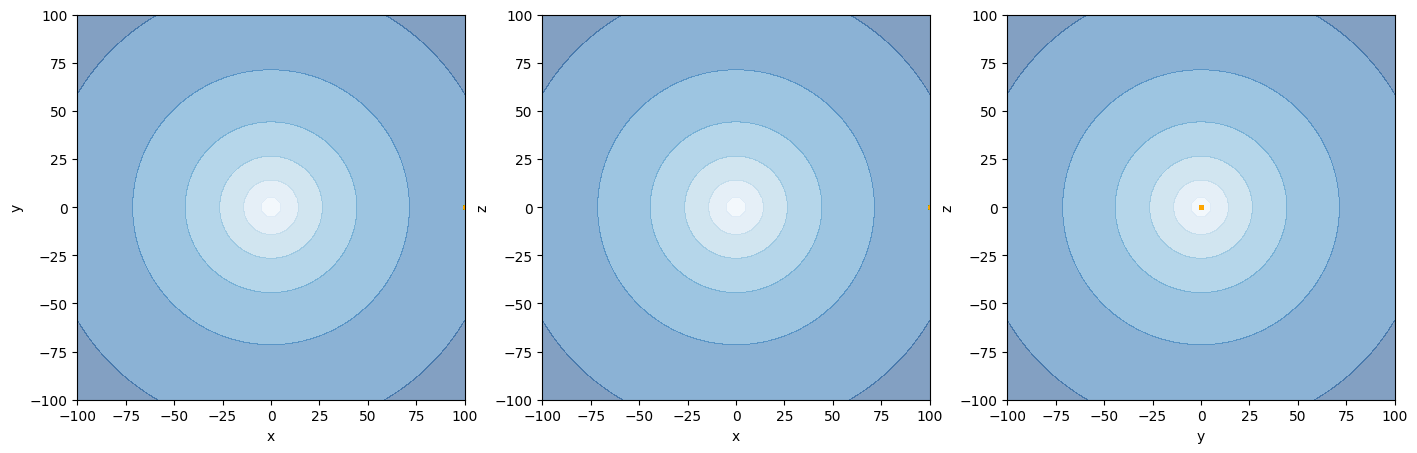

In [18]:
grid = np.linspace(-100,100,64)

frames_ = np.arange(0,orbit_2n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_2n.pos.x[i,:], orbit_2n.pos.y[i,:], c='orange', s=4.5, label='w0')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    
    dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_2n.pos.x[i,:], orbit_2n.pos.z[i,:], c='orange', s=4.5)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('z')
    
    dm_halo.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_2n.pos.y[i,:], orbit_2n.pos.z[i,:], c='orange', s=4.5)
    ax[2].set_xlabel('y')
    ax[2].set_ylabel('z')

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_2.gif', fps=10)

In [19]:
#grid = np.linspace(-40,40,64)
#
#fig, ax = plt.subplots(2,4, figsize=(18,9))
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0,0], alpha=0.5)
#ax[0,0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[0,0].scatter(orbit_0n.pos.x[300,:], orbit_0n.pos.y[300,:], c='purple', s=6)
#ax[0,0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[0,0].scatter(orbit_1n.pos.x[300,:], orbit_1n.pos.y[300,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0,1], alpha=0.5)
#ax[0,1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[0,1].scatter(orbit_0n.pos.x[500,:], orbit_0n.pos.y[500,:], c='purple', s=6)
#ax[0,1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[0,1].scatter(orbit_1n.pos.x[500,:], orbit_1n.pos.y[500,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0,2], alpha=0.5)
#ax[0,2].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[0,2].scatter(orbit_0n.pos.x[1000,:], orbit_0n.pos.y[1000,:], c='purple', s=6)
#ax[0,2].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[0,2].scatter(orbit_1n.pos.x[1000,:], orbit_1n.pos.y[1000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0,3], alpha=0.5)
#ax[0,3].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[0,3].scatter(orbit_0n.pos.x[5000,:], orbit_0n.pos.y[5000,:], c='purple', s=6)
#ax[0,3].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[0,3].scatter(orbit_1n.pos.x[5000,:], orbit_1n.pos.y[5000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[1,0], alpha=0.5)
#ax[1,0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[1,0].scatter(orbit_0n.pos.x[10000,:], orbit_0n.pos.y[10000,:], c='purple', s=6)
#ax[1,0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[1,0].scatter(orbit_1n.pos.x[10000,:], orbit_1n.pos.y[10000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[1,1], alpha=0.5)
#ax[1,1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[1,1].scatter(orbit_0n.pos.x[15000,:], orbit_0n.pos.y[15000,:], c='purple', s=6)
#ax[1,1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[1,1].scatter(orbit_1n.pos.x[15000,:], orbit_1n.pos.y[15000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[1,2], alpha=0.5)
#ax[1,2].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[1,2].scatter(orbit_0n.pos.x[17000,:], orbit_0n.pos.y[17000,:], c='purple', s=6)
#ax[1,2].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[1,2].scatter(orbit_1n.pos.x[17000,:], orbit_1n.pos.y[17000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[1,3], alpha=0.5)
#ax[1,3].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=6)
#ax[1,3].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.y[-1,:], c='purple', s=6)
#ax[1,3].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=6)
#ax[1,3].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.y[-1,:], c='limegreen', s=6)
#
#plt.show()

In [20]:
#grid = np.linspace(-40,40,64)
#
#fig, ax = plt.subplots(2,4, figsize=(18,9))
#
#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[0,0], alpha=0.5)
#ax[0,0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[0,0].scatter(orbit_0n.pos.x[300,:], orbit_0n.pos.z[300,:], c='purple', s=6)
#ax[0,0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[0,0].scatter(orbit_1n.pos.x[300,:], orbit_1n.pos.z[300,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[0,1], alpha=0.5)
#ax[0,1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[0,1].scatter(orbit_0n.pos.x[500,:], orbit_0n.pos.z[500,:], c='purple', s=6)
#ax[0,1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[0,1].scatter(orbit_1n.pos.x[500,:], orbit_1n.pos.z[500,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[0,2], alpha=0.5)
#ax[0,2].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[0,2].scatter(orbit_0n.pos.x[1000,:], orbit_0n.pos.z[1000,:], c='purple', s=6)
#ax[0,2].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[0,2].scatter(orbit_1n.pos.x[1000,:], orbit_1n.pos.z[1000,:], c='limegreen', s=6)
#
#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[0,3], alpha=0.5)
#ax[0,3].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[0,3].scatter(orbit_0n.pos.x[5000,:], orbit_0n.pos.z[5000,:], c='purple', s=6)
#ax[0,3].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[0,3].scatter(orbit_1n.pos.x[5000,:], orbit_1n.pos.z[5000,:], c='limegreen', s=6)

#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1,0], alpha=0.5)
#ax[1,0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[1,0].scatter(orbit_0n.pos.x[10000,:], orbit_0n.pos.z[10000,:], c='purple', s=6)
#ax[1,0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[1,0].scatter(orbit_1n.pos.x[10000,:], orbit_1n.pos.z[10000,:], c='limegreen', s=6)#

#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1,1], alpha=0.5)
#ax[1,1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[1,1].scatter(orbit_0n.pos.x[15000,:], orbit_0n.pos.z[15000,:], c='purple', s=6)
#ax[1,1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[1,1].scatter(orbit_1n.pos.x[15000,:], orbit_1n.pos.z[15000,:], c='limegreen', s=6)#

#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1,2], alpha=0.5)
#ax[1,2].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[1,2].scatter(orbit_0n.pos.x[17000,:], orbit_0n.pos.z[17000,:], c='purple', s=6)
#ax[1,2].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[1,2].scatter(orbit_1n.pos.x[17000,:], orbit_1n.pos.z[17000,:], c='limegreen', s=6)#

#dm_halo.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1,3], alpha=0.5)
#ax[1,3].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=6)
#ax[1,3].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=6)
#ax[1,3].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
#ax[1,3].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=6)#

#plt.show(#)

#### Graficar y observar evolución del sigma_x y sigma_v del enjambre. Probar con los sigma 3D y los sigmas en cada dimension por separado.

In [77]:
R_1, R_2 = 1, 2.5

V_1 = (4/3)*np.pi*(R_1*u.kpc)**3
V_2 = (4/3)*np.pi*(R_2*u.kpc)**3

In [78]:
mean_x_0, sigma_x_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_0, sigma_y_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_0, sigma_z_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_0, sigma_r_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_0, sigma_vx_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_0, sigma_vy_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_0, sigma_vz_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_0, sigma_vr_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#---
mean_x_1, sigma_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_1, sigma_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_1, sigma_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_1, sigma_vx_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_1, sigma_vy_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_1, sigma_vz_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_1, sigma_vr_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#-----
mean_x_2, sigma_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_2, sigma_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_2, sigma_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_2, sigma_vx_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_2, sigma_vy_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_2, sigma_vz_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_2, sigma_vr_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

t_ = np.zeros(int(t_f/dt))

In [91]:
(t_f/dt)

<Quantity 100. Gyr / Myr>

In [79]:
# ORBIT 0
for i_t in range(int(t_f/dt)):
    t_[i_t] = i_t*dt.value

    r0 = orbit_0n[i_t,:].pos - orbit_0.pos[i_t]
    v0 = orbit_0n[i_t,:].vel - orbit_0.vel[i_t]

    mean_x_0[i_t], sigma_x_0[i_t] = norm.fit(r0.x)
    mean_y_0[i_t], sigma_y_0[i_t] = norm.fit(r0.y)
    mean_z_0[i_t], sigma_z_0[i_t] = norm.fit(r0.z)
    mean_r_0[i_t], sigma_r_0[i_t] = norm.fit(r0.norm())

    mean_vx_0[i_t], sigma_vx_0[i_t] = norm.fit(v0.d_x)
    mean_vy_0[i_t], sigma_vy_0[i_t] = norm.fit(v0.d_y)
    mean_vz_0[i_t], sigma_vz_0[i_t] = norm.fit(v0.d_z)
    mean_vr_0[i_t], sigma_vr_0[i_t] = norm.fit(v0.norm())
    
    # -------

    r1 = orbit_1n[i_t,:].pos - orbit_1.pos[i_t]
    v1 = orbit_1n[i_t,:].vel - orbit_1.vel[i_t]

    mean_x_1[i_t], sigma_x_1[i_t] = norm.fit(r1.x)
    mean_y_1[i_t], sigma_y_1[i_t] = norm.fit(r1.y)
    mean_z_1[i_t], sigma_z_1[i_t] = norm.fit(r1.z)
    mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r1.norm())

    mean_vx_1[i_t], sigma_vx_1[i_t] = norm.fit(v1.d_x)
    mean_vy_1[i_t], sigma_vy_1[i_t] = norm.fit(v1.d_y)
    mean_vz_1[i_t], sigma_vz_1[i_t] = norm.fit(v1.d_z)
    mean_vr_1[i_t], sigma_vr_1[i_t] = norm.fit(v1.norm())
    
    # -------

    r2 = orbit_2n[i_t,:].pos - orbit_2.pos[i_t]
    v2 = orbit_2n[i_t,:].vel - orbit_2.vel[i_t]

    mean_x_2[i_t], sigma_x_2[i_t] = norm.fit(r2.x)
    mean_y_2[i_t], sigma_y_2[i_t] = norm.fit(r2.y)
    mean_z_2[i_t], sigma_z_2[i_t] = norm.fit(r2.z)
    mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r2.norm())

    mean_vx_2[i_t], sigma_vx_2[i_t] = norm.fit(v2.d_x)
    mean_vy_2[i_t], sigma_vy_2[i_t] = norm.fit(v2.d_y)
    mean_vz_2[i_t], sigma_vz_2[i_t] = norm.fit(v2.d_z)
    mean_vr_2[i_t], sigma_vr_2[i_t] = norm.fit(v2.norm())

IndexError: index 20000 is out of bounds for axis 0 with size 20000

In [ ]:
#s0_x = []
#s0_y = []
#s0_z = []
#s0_r = []
#s0_vx = []
#s0_vy = []
#s0_vz = []
#s0_vr  = []
#t0   = []
#density_01 = []
#density_02 = []
#
##-----------------------------
#
#s1_x = []
#s1_y = []
#s1_z = []
#s1_r = []
#s1_vx = []
#s1_vy = []
#s1_vz = []
#s1_vr  = []
#t1   = []
#density_11 = []
#density_12 = []
#
##-----------------------------
#
#s2_x = []
#s2_y = []
#s2_z = []
#s2_r = []
#s2_vx = []
#s2_vy = []
#s2_vz = []
#s2_vr  = []
#t2   = []
#density_21 = []
#density_22 = []

In [ ]:
## ORBIT 0
#for i in range(int(orbit_0n.t.shape[0]/dt.value)):
#    t0.append(orbit_0n.t[i].value)
#    #t0[i] = orbit_0n.t[i].value
#    r = orbit_0n[i,:].pos - orbit_0.pos[i]
#    s0_x.append(np.std(r.x.value))
#    s0_y.append(np.std(r.y.value))
#    s0_z.append(np.std(r.z))
#    s0_r.append(np.std(r.norm()))
#
#    v = orbit_0n[i,:].vel - orbit_0.vel[i]
#    s0_vx.append(np.std(v.d_x))
#    s0_vy.append(np.std(v.d_y))
#    s0_vz.append(np.std(v.d_z))
#    s0_vr.append(np.std(np.sqrt(v.norm())))

In [ ]:
## ORBIT 1
#for i in range(0,orbit_1n.t.shape[0],100):
#    r = orbit_1n[i,:].pos - orbit_1.pos[i]
#    s1_x.append(np.std(r.x))
#    s1_y.append(np.std(r.y))
#    s1_z.append(np.std(r.z))
#    s1_r.append(np.std(r.norm()))
#
#    v = orbit_1n[i,:].vel - orbit_1.vel[i]
#    s1_vx.append(np.std(v.d_x))
#    s1_vy.append(np.std(v.d_y))
#    s1_vz.append(np.std(v.d_z))
#    s1_vr.append(np.std(np.sqrt(v.norm())))

In [ ]:
## ORBIT 2
#for i in range(0,orbit_2n.t.shape[0],100):
#    r = orbit_2n[i,:].pos - orbit_2.pos[i]
#    s2_x.append(np.std(r.x))
#    s2_y.append(np.std(r.y))
#    s2_z.append(np.std(r.z))
#    s2_r.append(np.std(r.norm()))
#
#    v = orbit_2n[i,:].vel - orbit_2.vel[i]
#    s2_vx.append(np.std(v.d_x))
#    s2_vy.append(np.std(v.d_y))
#    s2_vz.append(np.std(v.d_z))
#    s2_vr.append(np.std(np.sqrt(v.norm())))

In [ ]:
fig, ax = plt.subplots(6,4, figsize=(25,30))

ax[0,0].plot(t_,sigma_x_0, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('sigma_x [kpc]')

ax[0,1].plot(t_,sigma_y_0, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('sigma_y [kpc]')

ax[0,2].plot(t_,sigma_z_0, c='purple')
ax[0,2].set_xlabel('t [Myr]')
ax[0,2].set_ylabel('sigma_z [kpc]')

ax[0,3].plot(t_,sigma_r_0, c='purple')
ax[0,3].set_xlabel('t [Myr]')
ax[0,3].set_ylabel('sigma_r [kpc]')


ax[1,0].plot(t_,sigma_vx_0, c='purple')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('sigma_vx [km/s]')

ax[1,1].plot(t_,sigma_vy_0, c='purple')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('sigma_vy [km/s]')

ax[1,2].plot(t_,sigma_vz_0, c='purple')
ax[1,2].set_xlabel('t [Myr]')
ax[1,2].set_ylabel('sigma_vz [km/s]')

ax[1,3].plot(t_,sigma_vr_0, c='purple')
ax[1,3].set_xlabel('t [Myr]')
ax[1,3].set_ylabel('sigma_v [km/s]')

#---------------------------------------------------

ax[2,0].plot(t_,sigma_x_1, c='limegreen')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('sigma_x [kpc]')

ax[2,1].plot(t_,sigma_y_1, c='limegreen')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('sigma_y [kpc]')

ax[2,2].plot(t_,sigma_z_1, c='limegreen')
ax[2,2].set_xlabel('t [Myr]')
ax[2,2].set_ylabel('sigma_z [kpc]')

ax[2,3].plot(t_,sigma_r_1, c='limegreen')
ax[2,3].set_xlabel('t [Myr]')
ax[2,3].set_ylabel('sigma_r [kpc]')


ax[3,0].plot(t_,sigma_vx_1, c='limegreen')
ax[3,0].set_xlabel('t [Myr]')
ax[3,0].set_ylabel('sigma_x [km/s]')

ax[3,1].plot(t_,sigma_vy_1, c='limegreen')
ax[3,1].set_xlabel('t [Myr]')
ax[3,1].set_ylabel('sigma_y [km/s]')

ax[3,2].plot(t_,sigma_vz_1, c='limegreen')
ax[3,2].set_xlabel('t [Myr]')
ax[3,2].set_ylabel('sigma_z [km/s]')

ax[3,3].plot(t_,sigma_vr_1, c='limegreen')
ax[3,3].set_xlabel('t [Myr]')
ax[3,3].set_ylabel('sigma_r [km/s]')

#---------------------------------------------------

ax[4,0].plot(t_,sigma_x_2, c='orange')
ax[4,0].set_xlabel('t [Myr]')
ax[4,0].set_ylabel('sigma_x [kpc]')

ax[4,1].plot(t_,sigma_y_2, c='orange')
ax[4,1].set_xlabel('t [Myr]')
ax[4,1].set_ylabel('sigma_y [kpc]')

ax[4,2].plot(t_,sigma_z_2, c='orange')
ax[4,2].set_xlabel('t [Myr]')
ax[4,2].set_ylabel('sigma_z [kpc]')

ax[4,3].plot(t_,sigma_r_2, c='orange')
ax[4,3].set_xlabel('t [Myr]')
ax[4,3].set_ylabel('sigma_r [kpc]')


ax[5,0].plot(t_,sigma_vx_2, c='orange')
ax[5,0].set_xlabel('t [Myr]')
ax[5,0].set_ylabel('sigma_x [km/s]')

ax[5,1].plot(t_,sigma_vy_2, c='orange')
ax[5,1].set_xlabel('t [Myr]')
ax[5,1].set_ylabel('sigma_y [km/s]')

ax[5,2].plot(t_,sigma_vz_2, c='orange')
ax[5,2].set_xlabel('t [Myr]')
ax[5,2].set_ylabel('sigma_z [km/s]')

ax[5,3].plot(t_,sigma_vr_2, c='orange')
ax[5,3].set_xlabel('t [Myr]')
ax[5,3].set_ylabel('sigma_r [km/s]')

#### Tomar esferas de 1 y 2,5 kpc de radio, centradas a todo tiempo t, en la órbita central del enjambre. En cada paso de integración, calcular la densidad de partículas dentro de estas esferas.

In [ ]:
# ORBIT 0
rho0_1 = np.zeros(int(t_f/dt))
rho0_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
#for i_t in range(int(orbit_0n.t.shape[0]/dt.value)):
    r = orbit_0n[i_t,:].pos - orbit_0.pos[i_t]
    r = r.norm()
    rho0_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho0_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

In [ ]:
# ORBIT 1
rho1_1 = np.zeros(int(t_f/dt))
rho1_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r = orbit_1n[i_t,:].pos - orbit_1.pos[i_t]
    r = r.norm()
    rho1_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho1_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

In [ ]:
# ORBIT 2
rho2_1 = np.zeros(int(t_f/dt))
rho2_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r = orbit_2n[i_t,:].pos - orbit_2.pos[i_t]
    r = r.norm()
    rho2_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho2_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

In [ ]:
#_x = []
#_y = []
#_z = []
#_r = []
#_vx = []
#_vy = []
#_vz = []
#_vr  = []
#   = []
#nsity_01 = []
#nsity_02 = []
#
#
#r i in range(0,orbit_0n.t.shape[0],10):
#  t0.append(orbit_0n.t[i].value)
#  
#  s0_x.append(np.std(orbit_0n.x[i,:]).value)
#  s0_y.append(np.std(orbit_0n.y[i,:]).value)
#  s0_z.append(np.std(orbit_0n.z[i,:]).value)
#  s0_r.append(np.std(np.sqrt( orbit_0n.x[i,:]**2 + orbit_0n.y[i:,]**2 + orbit_0n.z[i,:]**2 )).value)
#
#  s0_vx.append(np.std(orbit_0n.v_x[i,:]).value)
#  s0_vy.append(np.std(orbit_0n.v_y[i,:]).value)
#  s0_vz.append(np.std(orbit_0n.v_z[i,:]).value)
#  s0_vr.append(np.std(np.sqrt( orbit_0n.v_x[i,:]**2 + orbit_0n.v_y[i:,]**2 + orbit_0n.v_z[i,:]**2 )).value)
#
#  sph01 = orbit_0n[i,:][(orbit_0n.x[i,:]-orbit_0.x[i])**2 + (orbit_0n.y[i,:]-orbit_0.y[i])**2 + (orbit_0n.z[i,:]-orbit_0.z[i])**2 < (1*u.kpc)**2 ]
#  sph02 = orbit_0n[i,:][( orbit_0n.x[i,:]-orbit_0.x[i])**2 + (orbit_0n.y[i,:]-orbit_0.y[i])**2 + (orbit_0n.z[i,:]-orbit_0.z[i])**2 < (2.5*u.kpc)**2 ]
#  density_01.append(sph01.shape[0]/( (4/3)*np.pi*(1*u.kpc)**3 ).value) 
#  density_02.append(sph02.shape[0]/( (4/3)*np.pi*(2.5*u.kpc)**3 ).value) 

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,6))

ax[0,0].plot(t_,rho0_1, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('density (1 kpc)')

ax[0,1].plot(t_,rho0_2, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('density (2.5 kpc)')

ax[1,0].plot(t_,rho1_1, c='limegreen')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('density (1 kpc)')

ax[1,1].plot(t_,rho1_2, c='limegreen')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('density (2.5 kpc)')

ax[2,0].plot(t_,rho2_1, c='orange')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('density (1 kpc)')

ax[2,1].plot(t_,rho2_2, c='orange')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('density (2.5 kpc)')

## Un potencial NFW triaxial.

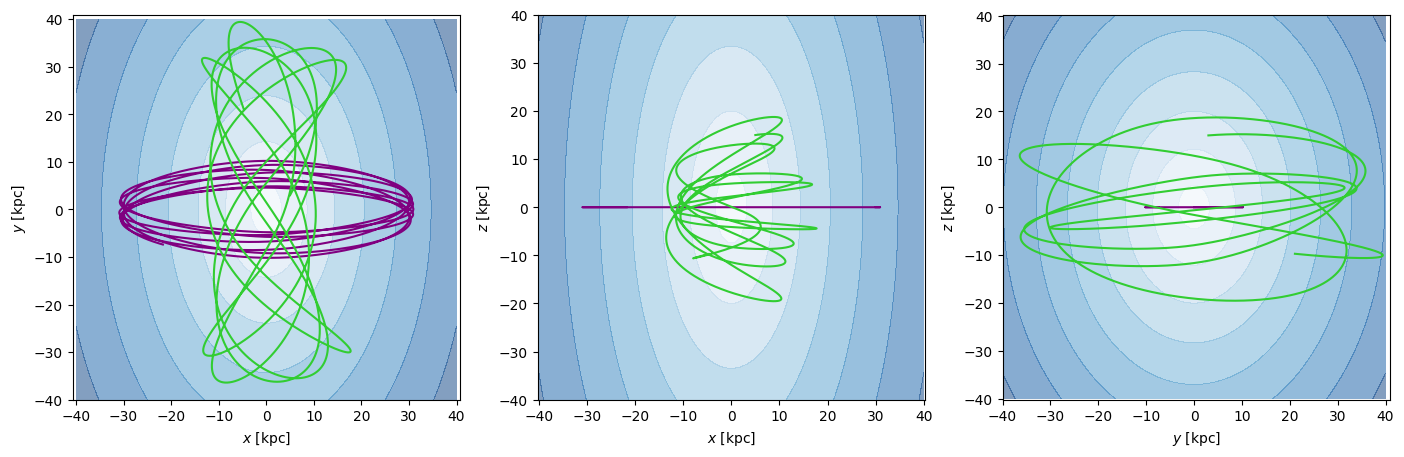

In [34]:
dm_tri = gp.NFWPotential(m=0.85*tot_mass, r_s=30.*u.kpc, a=3, b=5, c=7, units=galactic)

w0 = gd.PhaseSpacePosition(pos=[30, 0, 0]*u.kpc, vel=[30, 20, 0]*u.km/u.s)
w1 = gd.PhaseSpacePosition(pos=[5, 3, 15]*u.kpc, vel=[70, 127, 10]*u.km/u.s)

orbit_0 = gp.Hamiltonian(dm_tri).integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=10*u.Gyr)
orbit_1 = gp.Hamiltonian(dm_tri).integrate_orbit(w1, dt=0.1*u.Myr, t1=0, t2=10*u.Gyr)



grid = np.linspace(-40,40,64)
fig,ax = plt.subplots(1, 3, figsize=(17,5))

dm_tri.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'y'], color='purple', alpha=1.0, axes=[ax[0]]) 
orbit_1.plot(['x', 'y'], color='limegreen', alpha=1.0, axes=[ax[0]])

dm_tri.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'z'], color='purple', alpha=1.0, axes=[ax[1]]) 
orbit_1.plot(['x', 'z'], color='limegreen', alpha=1.0, axes=[ax[1]])

dm_tri.plot_contours(grid=(0, grid,grid), cmap='Blues', ax=ax[2], alpha=0.5, zorder=0)
orbit_0.plot(['y', 'z'], color='purple', alpha=1.0, axes=[ax[2]]) 
orbit_1.plot(['y', 'z'], color='limegreen', alpha=1.0, axes=[ax[2]])

plt.show()

Text(0, 0.5, 'r [kpc] ')

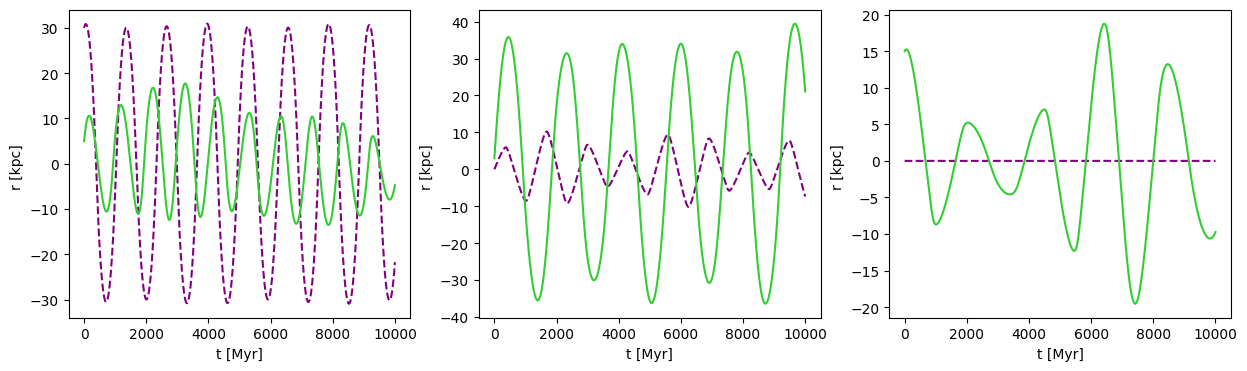

In [35]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))

ax0.plot(orbit_0.t, orbit_0.x, c='purple', ls='--')
ax0.plot(orbit_1.t, orbit_1.x, c='limegreen')
ax0.set_xlabel('t [Myr]')
ax0.set_ylabel('r [kpc] ')

ax1.plot(orbit_0.t, orbit_0.y, c='purple', ls='--')
ax1.plot(orbit_1.t, orbit_1.y, c='limegreen')
ax1.set_xlabel('t [Myr]')
ax1.set_ylabel('r [kpc] ')

ax2.plot(orbit_0.t, orbit_0.z, c='purple', ls='--')
ax2.plot(orbit_1.t, orbit_1.z, c='limegreen')
ax2.set_xlabel('t [Myr]')
ax2.set_ylabel('r [kpc] ')

In [36]:
norbits = 500

n_pos0 = np.random.normal(w0.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel0 = np.random.normal(w0.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s
n_pos1 = np.random.normal(w1.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel1 = np.random.normal(w1.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s

n_w0 = gd.PhaseSpacePosition(pos=n_pos0, vel=n_vel0)
n_w1 = gd.PhaseSpacePosition(pos=n_pos1, vel=n_vel1)

In [37]:
def integrate_orbit_tri(n_w, dt, t1, t2):
    dt = dt * u.Myr
    t1 = t1 * u.Gyr
    t2 = t2 * u.Gyr
    return dm_tri.integrate_orbit(n_w, dt=dt, t1=t1, t2=t2)

In [38]:
if __name__ == "__main__":
    with Pool(5) as p:
        start_time = time.time()
        orbit_0n = p.apply(integrate_orbit_tri, args=(n_w0, 0.5, 0, 10))
        orbit_1n = p.apply(integrate_orbit_tri, args=(n_w1, 0.5, 0, 10))
        p.close()
        p.join()
        print(time.time() - start_time)

15.59024977684021


Text(0, 0.5, 'z')

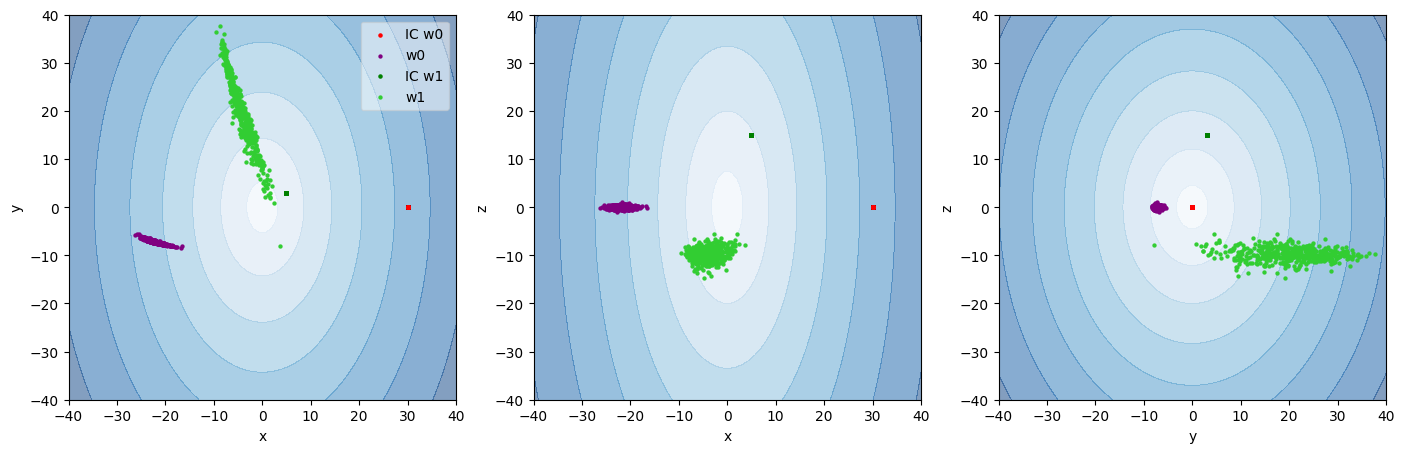

In [39]:
grid = np.linspace(-40,40,64)

fig, ax = plt.subplots(1,3, figsize=(17,5))

dm_tri.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
ax[0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=5, label='IC w0')
ax[0].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.y[-1,:], c='purple', s=4.5, label='w0')
ax[0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=5, label='IC w1')
ax[0].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.y[-1,:], c='limegreen', s=4.5, label='w1')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(fancybox=True, framealpha=0.5)

dm_tri.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
ax[1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[1].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[1].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')

dm_tri.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
ax[2].scatter(orbit_0n.pos.y[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[2].scatter(orbit_0n.pos.y[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[2].scatter(orbit_1n.pos.y[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[2].scatter(orbit_1n.pos.y[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')

MovieWriter ffmpeg unavailable; using Pillow instead.


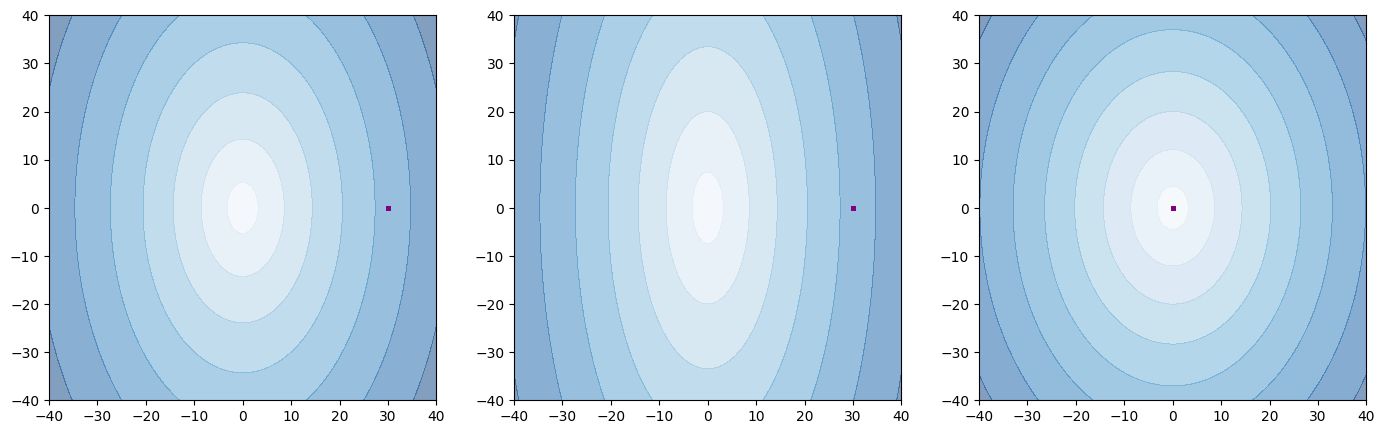

In [40]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_0n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    dm_tri.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.y[i,:], c='purple', s=4.5, label='w0')
    dm_tri.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)
    dm_tri.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_0n.pos.y[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_0_tri.gif', fps=10)

MovieWriter ffmpeg unavailable; using Pillow instead.


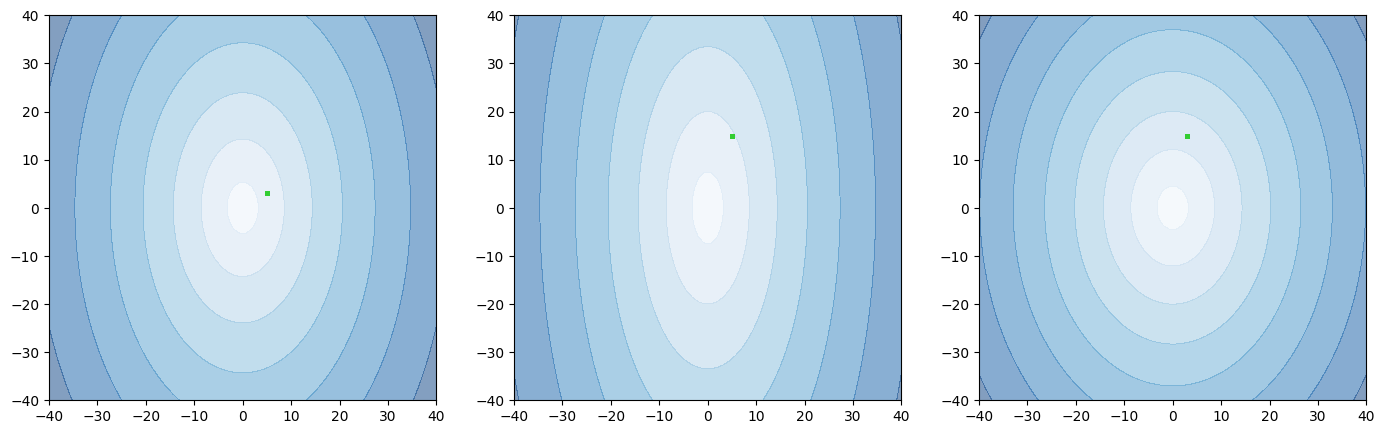

In [41]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_1n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    dm_tri.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.y[i,:], c='limegreen', s=4.5, label='w0')
    dm_tri.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)
    dm_tri.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_1n.pos.y[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_1_tri.gif', fps=10)

In [42]:
mean_x_0, sigma_x_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_0, sigma_y_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_0, sigma_z_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_0, sigma_r_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_0, sigma_vx_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_0, sigma_vy_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_0, sigma_vz_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_0, sigma_vr_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#---
mean_x_1, sigma_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_1, sigma_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_1, sigma_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_1, sigma_vx_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_1, sigma_vy_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_1, sigma_vz_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_1, sigma_vr_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#-----
mean_x_2, sigma_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_2, sigma_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_2, sigma_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_2, sigma_vx_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_2, sigma_vy_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_2, sigma_vz_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_2, sigma_vr_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

t_ = np.zeros(int(t_f/dt))

In [43]:
# ORBIT 0
for i_t in range(int(t_f/dt)):
    t_[i_t] = i_t*dt.value

    r0 = orbit_0n[i_t,:].pos - orbit_0.pos[i_t]
    v0 = orbit_0n[i_t,:].vel - orbit_0.vel[i_t]

    mean_x_0[i_t], sigma_x_0[i_t] = norm.fit(r0.x)
    mean_y_0[i_t], sigma_y_0[i_t] = norm.fit(r0.y)
    mean_z_0[i_t], sigma_z_0[i_t] = norm.fit(r0.z)
    mean_r_0[i_t], sigma_r_0[i_t] = norm.fit(r0.norm())

    mean_vx_0[i_t], sigma_vx_0[i_t] = norm.fit(v0.d_x)
    mean_vy_0[i_t], sigma_vy_0[i_t] = norm.fit(v0.d_y)
    mean_vz_0[i_t], sigma_vz_0[i_t] = norm.fit(v0.d_z)
    mean_vr_0[i_t], sigma_vr_0[i_t] = norm.fit(v0.norm())
    
    # -------

    r1 = orbit_1n[i_t,:].pos - orbit_1.pos[i_t]
    v1 = orbit_1n[i_t,:].vel - orbit_1.vel[i_t]

    mean_x_1[i_t], sigma_x_1[i_t] = norm.fit(r1.x)
    mean_y_1[i_t], sigma_y_1[i_t] = norm.fit(r1.y)
    mean_z_1[i_t], sigma_z_1[i_t] = norm.fit(r1.z)
    mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r1.norm())

    mean_vx_1[i_t], sigma_vx_1[i_t] = norm.fit(v1.d_x)
    mean_vy_1[i_t], sigma_vy_1[i_t] = norm.fit(v1.d_y)
    mean_vz_1[i_t], sigma_vz_1[i_t] = norm.fit(v1.d_z)
    mean_vr_1[i_t], sigma_vr_1[i_t] = norm.fit(v1.norm())
    
    # -------

    r2 = orbit_2n[i_t,:].pos - orbit_2.pos[i_t]
    v2 = orbit_2n[i_t,:].vel - orbit_2.vel[i_t]

    mean_x_2[i_t], sigma_x_2[i_t] = norm.fit(r2.x)
    mean_y_2[i_t], sigma_y_2[i_t] = norm.fit(r2.y)
    mean_z_2[i_t], sigma_z_2[i_t] = norm.fit(r2.z)
    mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r2.norm())

    mean_vx_2[i_t], sigma_vx_2[i_t] = norm.fit(v2.d_x)
    mean_vy_2[i_t], sigma_vy_2[i_t] = norm.fit(v2.d_y)
    mean_vz_2[i_t], sigma_vz_2[i_t] = norm.fit(v2.d_z)
    mean_vr_2[i_t], sigma_vr_2[i_t] = norm.fit(v2.norm())

Text(0, 0.5, 'sigma_r [km/s]')

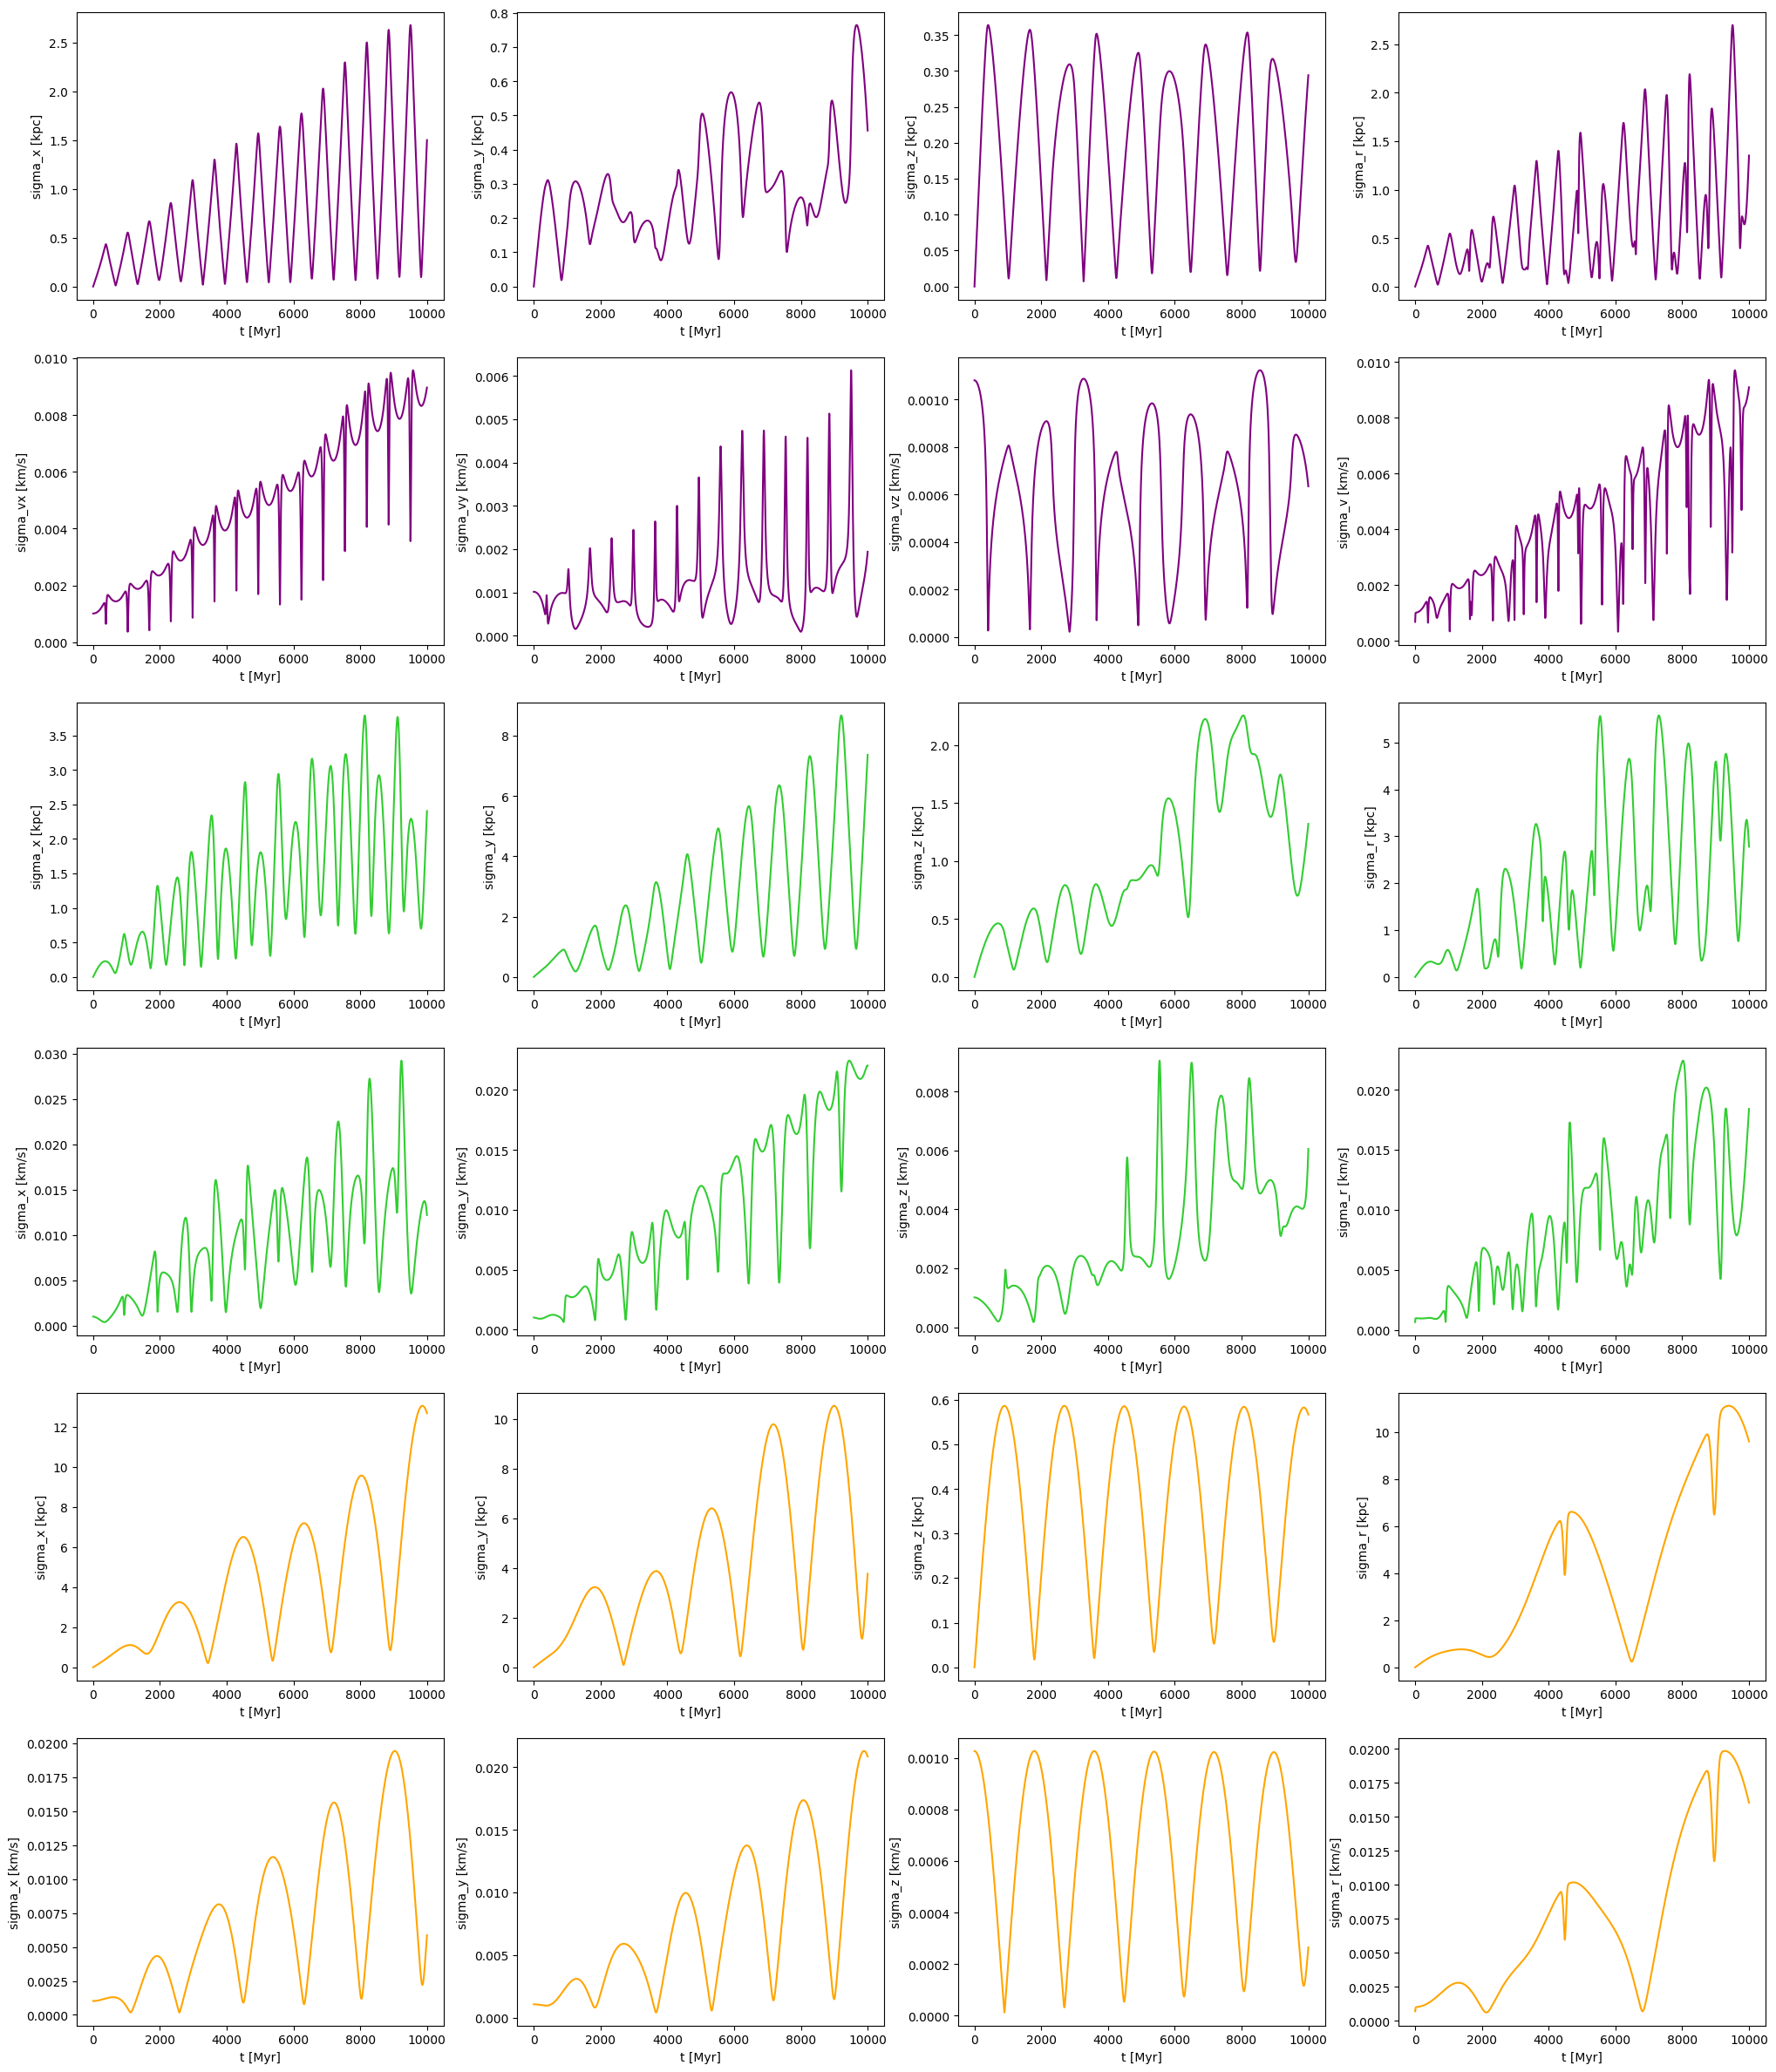

In [44]:
fig, ax = plt.subplots(6,4, figsize=(25,30))

ax[0,0].plot(t_,sigma_x_0, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('sigma_x [kpc]')

ax[0,1].plot(t_,sigma_y_0, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('sigma_y [kpc]')

ax[0,2].plot(t_,sigma_z_0, c='purple')
ax[0,2].set_xlabel('t [Myr]')
ax[0,2].set_ylabel('sigma_z [kpc]')

ax[0,3].plot(t_,sigma_r_0, c='purple')
ax[0,3].set_xlabel('t [Myr]')
ax[0,3].set_ylabel('sigma_r [kpc]')


ax[1,0].plot(t_,sigma_vx_0, c='purple')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('sigma_vx [km/s]')

ax[1,1].plot(t_,sigma_vy_0, c='purple')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('sigma_vy [km/s]')

ax[1,2].plot(t_,sigma_vz_0, c='purple')
ax[1,2].set_xlabel('t [Myr]')
ax[1,2].set_ylabel('sigma_vz [km/s]')

ax[1,3].plot(t_,sigma_vr_0, c='purple')
ax[1,3].set_xlabel('t [Myr]')
ax[1,3].set_ylabel('sigma_v [km/s]')

#---------------------------------------------------

ax[2,0].plot(t_,sigma_x_1, c='limegreen')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('sigma_x [kpc]')

ax[2,1].plot(t_,sigma_y_1, c='limegreen')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('sigma_y [kpc]')

ax[2,2].plot(t_,sigma_z_1, c='limegreen')
ax[2,2].set_xlabel('t [Myr]')
ax[2,2].set_ylabel('sigma_z [kpc]')

ax[2,3].plot(t_,sigma_r_1, c='limegreen')
ax[2,3].set_xlabel('t [Myr]')
ax[2,3].set_ylabel('sigma_r [kpc]')


ax[3,0].plot(t_,sigma_vx_1, c='limegreen')
ax[3,0].set_xlabel('t [Myr]')
ax[3,0].set_ylabel('sigma_x [km/s]')

ax[3,1].plot(t_,sigma_vy_1, c='limegreen')
ax[3,1].set_xlabel('t [Myr]')
ax[3,1].set_ylabel('sigma_y [km/s]')

ax[3,2].plot(t_,sigma_vz_1, c='limegreen')
ax[3,2].set_xlabel('t [Myr]')
ax[3,2].set_ylabel('sigma_z [km/s]')

ax[3,3].plot(t_,sigma_vr_1, c='limegreen')
ax[3,3].set_xlabel('t [Myr]')
ax[3,3].set_ylabel('sigma_r [km/s]')

#---------------------------------------------------

ax[4,0].plot(t_,sigma_x_2, c='orange')
ax[4,0].set_xlabel('t [Myr]')
ax[4,0].set_ylabel('sigma_x [kpc]')

ax[4,1].plot(t_,sigma_y_2, c='orange')
ax[4,1].set_xlabel('t [Myr]')
ax[4,1].set_ylabel('sigma_y [kpc]')

ax[4,2].plot(t_,sigma_z_2, c='orange')
ax[4,2].set_xlabel('t [Myr]')
ax[4,2].set_ylabel('sigma_z [kpc]')

ax[4,3].plot(t_,sigma_r_2, c='orange')
ax[4,3].set_xlabel('t [Myr]')
ax[4,3].set_ylabel('sigma_r [kpc]')


ax[5,0].plot(t_,sigma_vx_2, c='orange')
ax[5,0].set_xlabel('t [Myr]')
ax[5,0].set_ylabel('sigma_x [km/s]')

ax[5,1].plot(t_,sigma_vy_2, c='orange')
ax[5,1].set_xlabel('t [Myr]')
ax[5,1].set_ylabel('sigma_y [km/s]')

ax[5,2].plot(t_,sigma_vz_2, c='orange')
ax[5,2].set_xlabel('t [Myr]')
ax[5,2].set_ylabel('sigma_z [km/s]')

ax[5,3].plot(t_,sigma_vr_2, c='orange')
ax[5,3].set_xlabel('t [Myr]')
ax[5,3].set_ylabel('sigma_r [km/s]')

In [45]:
# ORBIT 0
rho0_1 = np.zeros(int(t_f/dt))
rho0_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
#for i_t in range(int(orbit_0n.t.shape[0]/dt.value)):
    r = orbit_0n[i_t,:].pos - orbit_0.pos[i_t]
    r = r.norm()
    rho0_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho0_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

In [46]:
# ORBIT 1
rho1_1 = np.zeros(int(t_f/dt))
rho1_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r = orbit_1n[i_t,:].pos - orbit_1.pos[i_t]
    r = r.norm()
    rho1_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho1_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

In [47]:
# ORBIT 2
rho2_1 = np.zeros(int(t_f/dt))
rho2_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r = orbit_2n[i_t,:].pos - orbit_2.pos[i_t]
    r = r.norm()
    rho2_1[i_t] = len(np.where(r.value < R_1)[0])/V_1.value
    rho2_2[i_t] = len(np.where(r.value < R_2)[0])/V_2.value

Text(0, 0.5, 'density (2.5 kpc)')

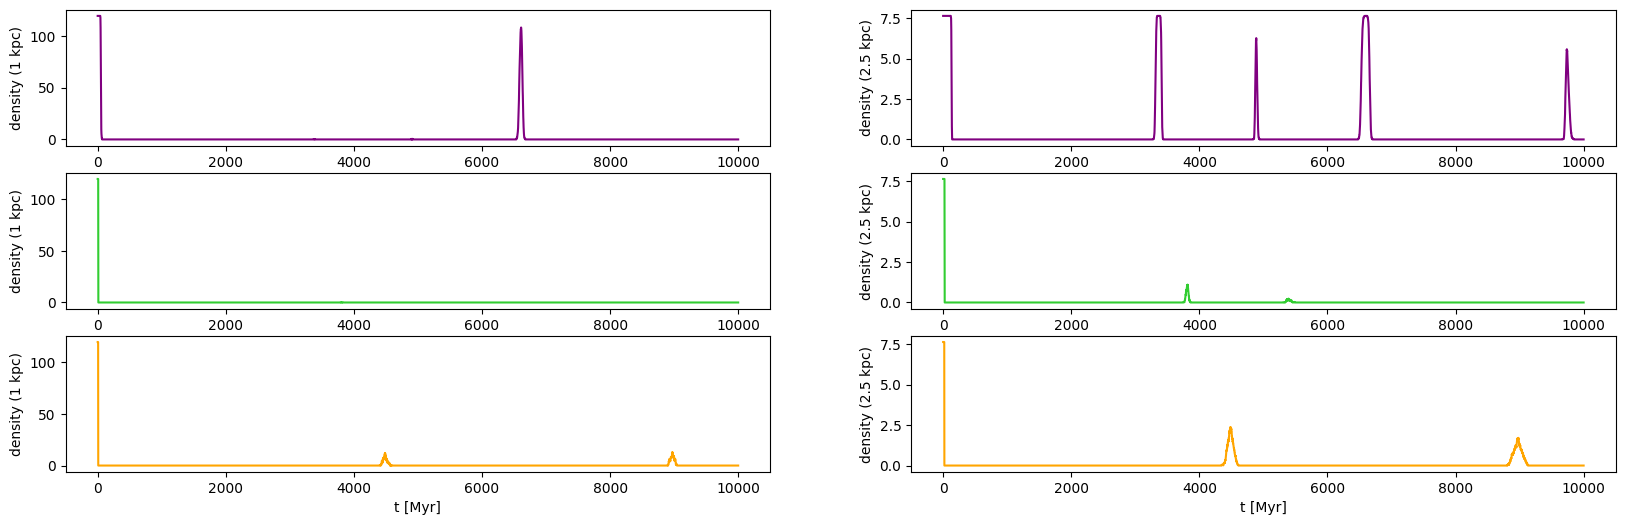

In [48]:
fig, ax = plt.subplots(3,2, figsize=(20,6))

ax[0,0].plot(t_,rho0_1, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('density (1 kpc)')

ax[0,1].plot(t_,rho0_2, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('density (2.5 kpc)')

ax[1,0].plot(t_,rho1_1, c='limegreen')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('density (1 kpc)')

ax[1,1].plot(t_,rho1_2, c='limegreen')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('density (2.5 kpc)')

ax[2,0].plot(t_,rho2_1, c='orange')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('density (1 kpc)')

ax[2,1].plot(t_,rho2_2, c='orange')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('density (2.5 kpc)')

## Un potencial MW-like

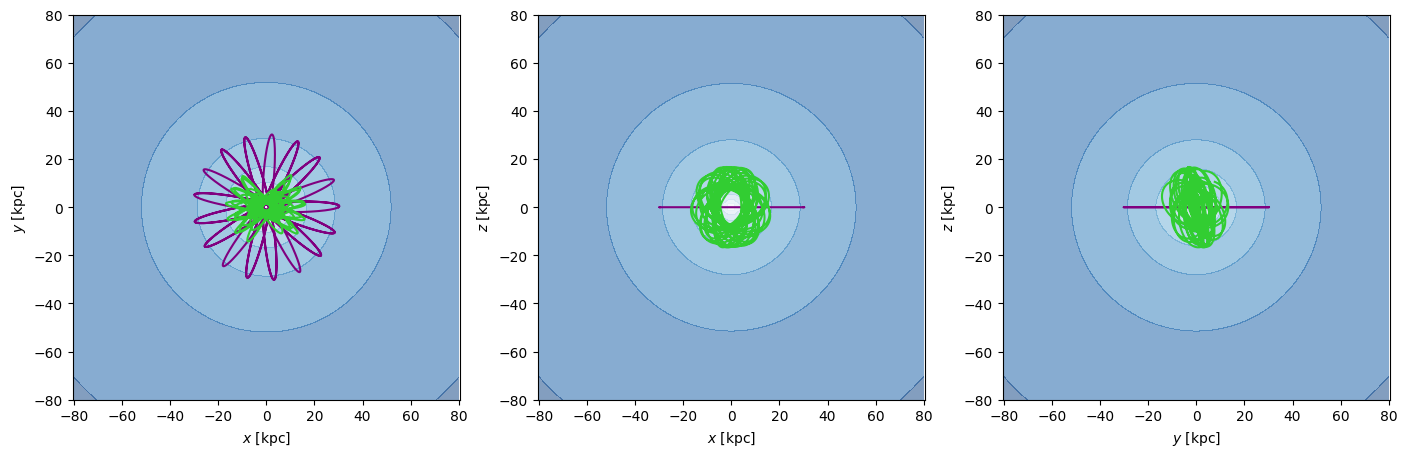

In [49]:
mw = gp.MilkyWayPotential()

w0 = gd.PhaseSpacePosition(pos=[30, 0, 0]*u.kpc, vel=[30, 20, 0]*u.km/u.s)
w1 = gd.PhaseSpacePosition(pos=[5, 3, 15]*u.kpc, vel=[70, 127, 10]*u.km/u.s)

orbit_0 = gp.Hamiltonian(mw).integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=10*u.Gyr)
orbit_1 = gp.Hamiltonian(mw).integrate_orbit(w1, dt=0.1*u.Myr, t1=0, t2=10*u.Gyr)


grid = np.linspace(-80,80,64)
fig,ax = plt.subplots(1, 3, figsize=(17,5))

mw.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'y'], color='purple', alpha=1.0, axes=[ax[0]]) 
orbit_1.plot(['x', 'y'], color='limegreen', alpha=1.0, axes=[ax[0]])

mw.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5, zorder=0)
orbit_0.plot(['x', 'z'], color='purple', alpha=1.0, axes=[ax[1]]) 
orbit_1.plot(['x', 'z'], color='limegreen', alpha=1.0, axes=[ax[1]])

mw.plot_contours(grid=(0, grid,grid), cmap='Blues', ax=ax[2], alpha=0.5, zorder=0)
orbit_0.plot(['y', 'z'], color='purple', alpha=1.0, axes=[ax[2]]) 
orbit_1.plot(['y', 'z'], color='limegreen', alpha=1.0, axes=[ax[2]])

plt.show()

Text(0, 0.5, 'r [kpc] ')

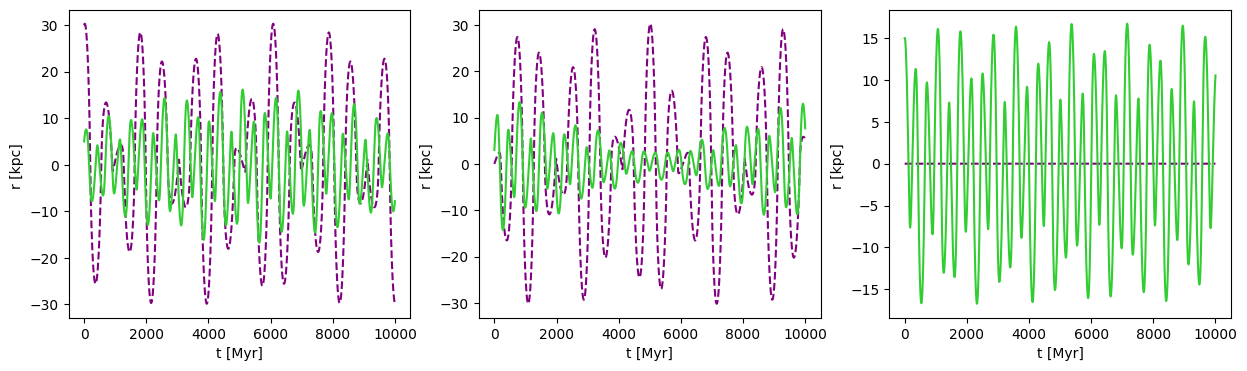

In [50]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))

ax0.plot(orbit_0.t, orbit_0.x, c='purple', ls='--')
ax0.plot(orbit_1.t, orbit_1.x, c='limegreen')
ax0.set_xlabel('t [Myr]')
ax0.set_ylabel('r [kpc] ')

ax1.plot(orbit_0.t, orbit_0.y, c='purple', ls='--')
ax1.plot(orbit_1.t, orbit_1.y, c='limegreen')
ax1.set_xlabel('t [Myr]')
ax1.set_ylabel('r [kpc] ')

ax2.plot(orbit_0.t, orbit_0.z, c='purple', ls='--')
ax2.plot(orbit_1.t, orbit_1.z, c='limegreen')
ax2.set_xlabel('t [Myr]')
ax2.set_ylabel('r [kpc] ')

In [51]:
norbits = 500

n_pos0 = np.random.normal(w0.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel0 = np.random.normal(w0.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s
n_pos1 = np.random.normal(w1.pos.xyz.value, 1e-5, size=(norbits,3)).T * u.kpc
n_vel1 = np.random.normal(w1.vel.d_xyz.value, 1, size=(norbits,3)).T * u.km/u.s

n_w0 = gd.PhaseSpacePosition(pos=n_pos0, vel=n_vel0)
n_w1 = gd.PhaseSpacePosition(pos=n_pos1, vel=n_vel1)

In [52]:
def integrate_orbit_mw(n_w, dt, t1, t2):
    dt = dt * u.Myr
    t1 = t1 * u.Gyr
    t2 = t2 * u.Gyr
    return mw.integrate_orbit(n_w, dt=dt, t1=t1, t2=t2)

In [53]:
if __name__ == "__main__":
    with Pool(5) as p:
        start_time = time.time()
        orbit_0n = p.apply(integrate_orbit_mw, args=(n_w0, 0.5, 0, 10))
        orbit_1n = p.apply(integrate_orbit_mw, args=(n_w1, 0.5, 0, 10))
        p.close()
        p.join()
        print(time.time() - start_time)

16.63671326637268


Text(0, 0.5, 'z')

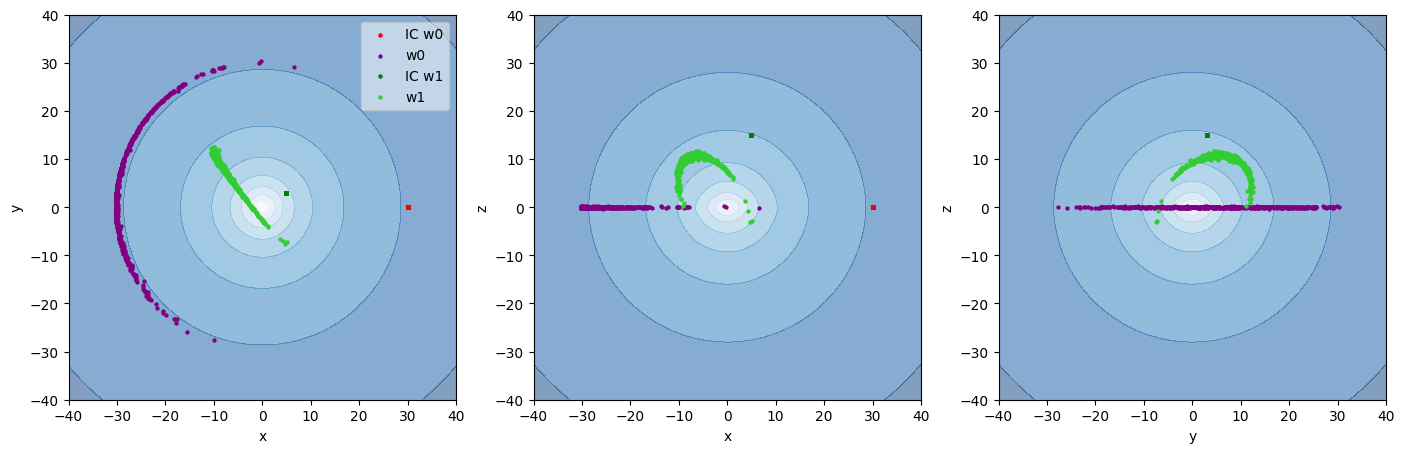

In [54]:
grid = np.linspace(-40,40,64)

fig, ax = plt.subplots(1,3, figsize=(17,5))

mw.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
ax[0].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.y[0,:], c='red', s=5, label='IC w0')
ax[0].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.y[-1,:], c='purple', s=4.5, label='w0')
ax[0].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.y[0,:], c='green', s=5, label='IC w1')
ax[0].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.y[-1,:], c='limegreen', s=4.5, label='w1')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(fancybox=True, framealpha=0.5)

mw.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
ax[1].scatter(orbit_0n.pos.x[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[1].scatter(orbit_0n.pos.x[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[1].scatter(orbit_1n.pos.x[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[1].scatter(orbit_1n.pos.x[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')

mw.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
ax[2].scatter(orbit_0n.pos.y[0,:], orbit_0n.pos.z[0,:], c='red', s=5)
ax[2].scatter(orbit_0n.pos.y[-1,:], orbit_0n.pos.z[-1,:], c='purple', s=4.5)
ax[2].scatter(orbit_1n.pos.y[0,:], orbit_1n.pos.z[0,:], c='green', s=6)
ax[2].scatter(orbit_1n.pos.y[-1,:], orbit_1n.pos.z[-1,:], c='limegreen', s=4.5)
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')

MovieWriter ffmpeg unavailable; using Pillow instead.


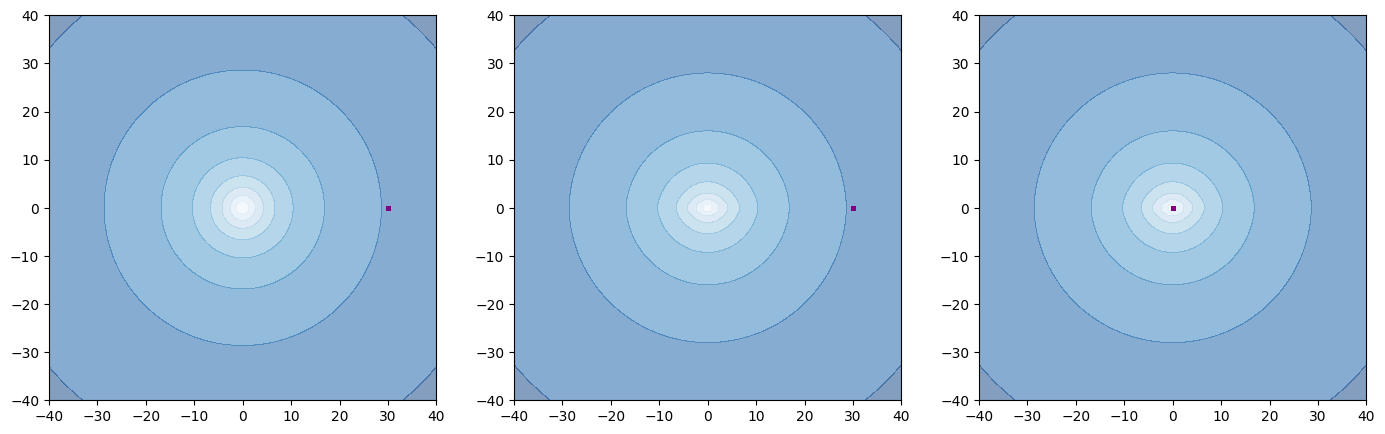

In [55]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_0n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    mw.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.y[i,:], c='purple', s=4.5, label='w0')
    mw.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_0n.pos.x[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)
    mw.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_0n.pos.y[i,:], orbit_0n.pos.z[i,:], c='purple', s=4.5)

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_0_MW.gif', fps=10)

MovieWriter ffmpeg unavailable; using Pillow instead.


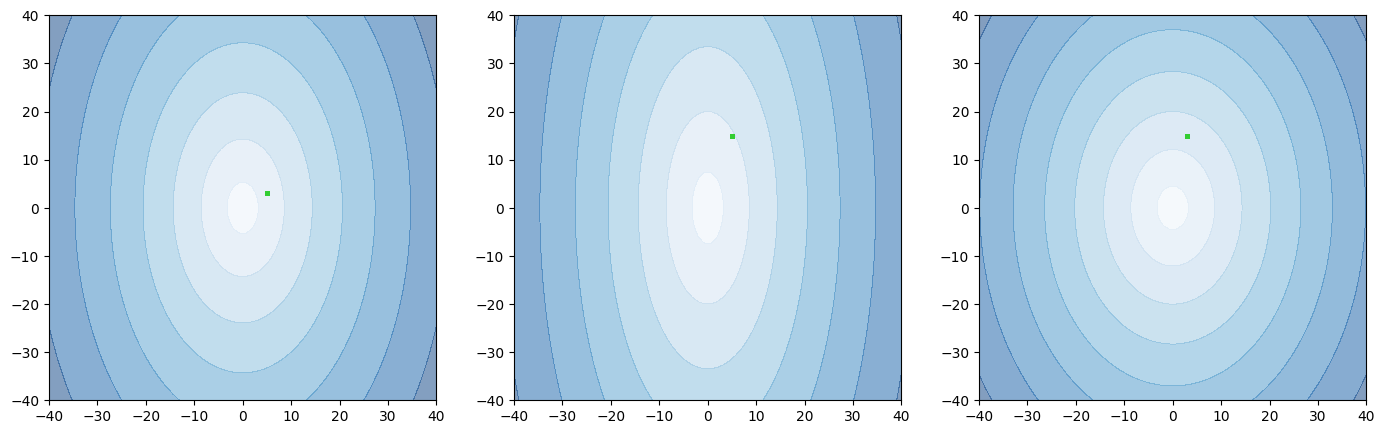

In [56]:
grid = np.linspace(-40,40,64)

frames_ = np.arange(0,orbit_1n.t.shape[0],100)
fig, ax = plt.subplots(1,3, figsize=(17,5))

def anim_ac(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    dm_tri.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0], alpha=0.5)
    ax[0].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.y[i,:], c='limegreen', s=4.5, label='w0')
    dm_tri.plot_contours(grid=(grid,0,grid), cmap='Blues', ax=ax[1], alpha=0.5)
    ax[1].scatter(orbit_1n.pos.x[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)
    dm_tri.plot_contours(grid=(0,grid,grid), cmap='Blues', ax=ax[2], alpha=0.5)
    ax[2].scatter(orbit_1n.pos.y[i,:], orbit_1n.pos.z[i,:], c='limegreen', s=4.5)

ani = FuncAnimation(fig, anim_ac, frames=frames_)
ani.save('orbit_1_MW.gif', fps=10)

In [57]:
mean_x_0, sigma_x_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_0, sigma_y_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_0, sigma_z_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_0, sigma_r_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_0, sigma_vx_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_0, sigma_vy_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_0, sigma_vz_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_0, sigma_vr_0 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#---
mean_x_1, sigma_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_1, sigma_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_1, sigma_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_1, sigma_vx_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_1, sigma_vy_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_1, sigma_vz_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_1, sigma_vr_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
#-----
mean_x_2, sigma_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_y_2, sigma_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_z_2, sigma_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

mean_vx_2, sigma_vx_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vy_2, sigma_vy_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vz_2, sigma_vz_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_vr_2, sigma_vr_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

t_ = np.zeros(int(t_f/dt))

In [58]:
# ORBIT 0
for i_t in range(int(t_f/dt)):
    t_[i_t] = i_t*dt.value

    r0 = orbit_0n[i_t,:].pos - orbit_0.pos[i_t]
    v0 = orbit_0n[i_t,:].vel - orbit_0.vel[i_t]

    mean_x_0[i_t], sigma_x_0[i_t] = norm.fit(r0.x)
    mean_y_0[i_t], sigma_y_0[i_t] = norm.fit(r0.y)
    mean_z_0[i_t], sigma_z_0[i_t] = norm.fit(r0.z)
    mean_r_0[i_t], sigma_r_0[i_t] = norm.fit(r0.norm())

    mean_vx_0[i_t], sigma_vx_0[i_t] = norm.fit(v0.d_x)
    mean_vy_0[i_t], sigma_vy_0[i_t] = norm.fit(v0.d_y)
    mean_vz_0[i_t], sigma_vz_0[i_t] = norm.fit(v0.d_z)
    mean_vr_0[i_t], sigma_vr_0[i_t] = norm.fit(v0.norm())
    
    # -------

    r1 = orbit_1n[i_t,:].pos - orbit_1.pos[i_t]
    v1 = orbit_1n[i_t,:].vel - orbit_1.vel[i_t]

    mean_x_1[i_t], sigma_x_1[i_t] = norm.fit(r1.x)
    mean_y_1[i_t], sigma_y_1[i_t] = norm.fit(r1.y)
    mean_z_1[i_t], sigma_z_1[i_t] = norm.fit(r1.z)
    mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r1.norm())

    mean_vx_1[i_t], sigma_vx_1[i_t] = norm.fit(v1.d_x)
    mean_vy_1[i_t], sigma_vy_1[i_t] = norm.fit(v1.d_y)
    mean_vz_1[i_t], sigma_vz_1[i_t] = norm.fit(v1.d_z)
    mean_vr_1[i_t], sigma_vr_1[i_t] = norm.fit(v1.norm())
    
    # -------

    r2 = orbit_2n[i_t,:].pos - orbit_2.pos[i_t]
    v2 = orbit_2n[i_t,:].vel - orbit_2.vel[i_t]

    mean_x_2[i_t], sigma_x_2[i_t] = norm.fit(r2.x)
    mean_y_2[i_t], sigma_y_2[i_t] = norm.fit(r2.y)
    mean_z_2[i_t], sigma_z_2[i_t] = norm.fit(r2.z)
    mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r2.norm())

    mean_vx_2[i_t], sigma_vx_2[i_t] = norm.fit(v2.d_x)
    mean_vy_2[i_t], sigma_vy_2[i_t] = norm.fit(v2.d_y)
    mean_vz_2[i_t], sigma_vz_2[i_t] = norm.fit(v2.d_z)
    mean_vr_2[i_t], sigma_vr_2[i_t] = norm.fit(v2.norm())

Text(0, 0.5, 'sigma_r [km/s]')

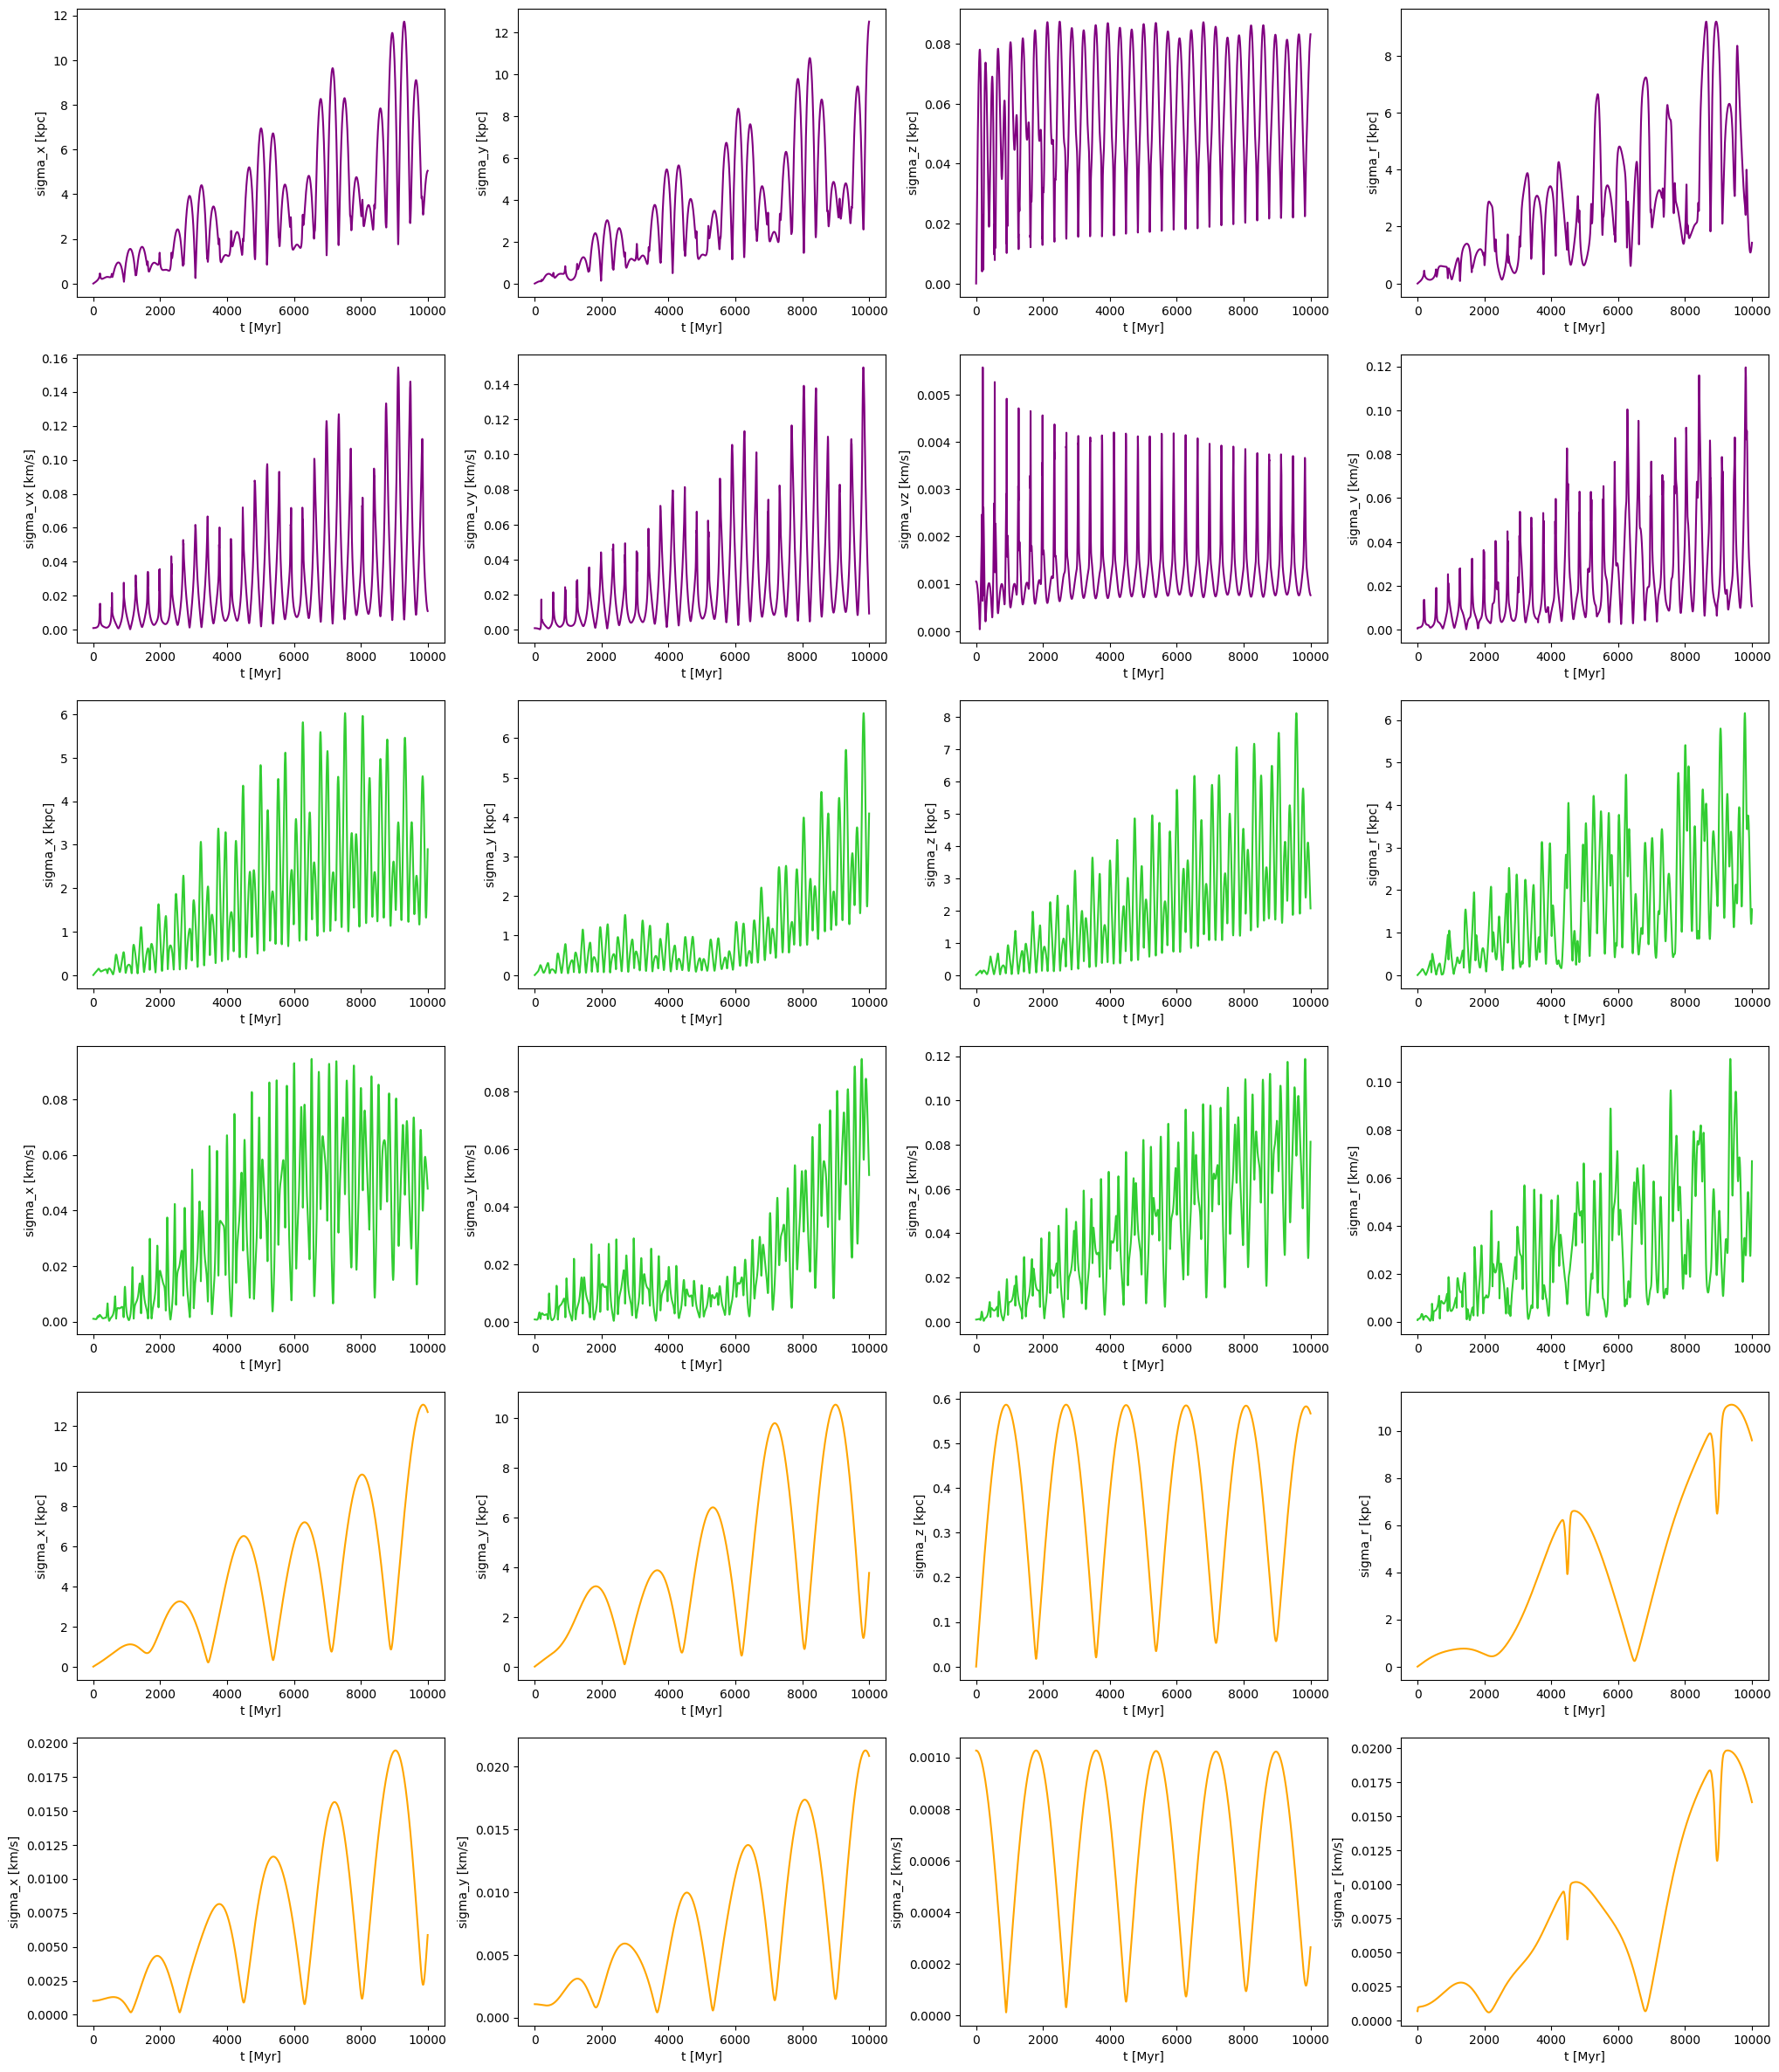

In [61]:
fig, ax = plt.subplots(6,4, figsize=(25,30))

ax[0,0].plot(t_,sigma_x_0, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('sigma_x [kpc]')

ax[0,1].plot(t_,sigma_y_0, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('sigma_y [kpc]')

ax[0,2].plot(t_,sigma_z_0, c='purple')
ax[0,2].set_xlabel('t [Myr]')
ax[0,2].set_ylabel('sigma_z [kpc]')

ax[0,3].plot(t_,sigma_r_0, c='purple')
ax[0,3].set_xlabel('t [Myr]')
ax[0,3].set_ylabel('sigma_r [kpc]')


ax[1,0].plot(t_,sigma_vx_0, c='purple')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('sigma_vx [km/s]')

ax[1,1].plot(t_,sigma_vy_0, c='purple')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('sigma_vy [km/s]')

ax[1,2].plot(t_,sigma_vz_0, c='purple')
ax[1,2].set_xlabel('t [Myr]')
ax[1,2].set_ylabel('sigma_vz [km/s]')

ax[1,3].plot(t_,sigma_vr_0, c='purple')
ax[1,3].set_xlabel('t [Myr]')
ax[1,3].set_ylabel('sigma_v [km/s]')

#---------------------------------------------------

ax[2,0].plot(t_,sigma_x_1, c='limegreen')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('sigma_x [kpc]')

ax[2,1].plot(t_,sigma_y_1, c='limegreen')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('sigma_y [kpc]')

ax[2,2].plot(t_,sigma_z_1, c='limegreen')
ax[2,2].set_xlabel('t [Myr]')
ax[2,2].set_ylabel('sigma_z [kpc]')

ax[2,3].plot(t_,sigma_r_1, c='limegreen')
ax[2,3].set_xlabel('t [Myr]')
ax[2,3].set_ylabel('sigma_r [kpc]')


ax[3,0].plot(t_,sigma_vx_1, c='limegreen')
ax[3,0].set_xlabel('t [Myr]')
ax[3,0].set_ylabel('sigma_x [km/s]')

ax[3,1].plot(t_,sigma_vy_1, c='limegreen')
ax[3,1].set_xlabel('t [Myr]')
ax[3,1].set_ylabel('sigma_y [km/s]')

ax[3,2].plot(t_,sigma_vz_1, c='limegreen')
ax[3,2].set_xlabel('t [Myr]')
ax[3,2].set_ylabel('sigma_z [km/s]')

ax[3,3].plot(t_,sigma_vr_1, c='limegreen')
ax[3,3].set_xlabel('t [Myr]')
ax[3,3].set_ylabel('sigma_r [km/s]')

#---------------------------------------------------

ax[4,0].plot(t_,sigma_x_2, c='orange')
ax[4,0].set_xlabel('t [Myr]')
ax[4,0].set_ylabel('sigma_x [kpc]')

ax[4,1].plot(t_,sigma_y_2, c='orange')
ax[4,1].set_xlabel('t [Myr]')
ax[4,1].set_ylabel('sigma_y [kpc]')

ax[4,2].plot(t_,sigma_z_2, c='orange')
ax[4,2].set_xlabel('t [Myr]')
ax[4,2].set_ylabel('sigma_z [kpc]')

ax[4,3].plot(t_,sigma_r_2, c='orange')
ax[4,3].set_xlabel('t [Myr]')
ax[4,3].set_ylabel('sigma_r [kpc]')


ax[5,0].plot(t_,sigma_vx_2, c='orange')
ax[5,0].set_xlabel('t [Myr]')
ax[5,0].set_ylabel('sigma_x [km/s]')

ax[5,1].plot(t_,sigma_vy_2, c='orange')
ax[5,1].set_xlabel('t [Myr]')
ax[5,1].set_ylabel('sigma_y [km/s]')

ax[5,2].plot(t_,sigma_vz_2, c='orange')
ax[5,2].set_xlabel('t [Myr]')
ax[5,2].set_ylabel('sigma_z [km/s]')

ax[5,3].plot(t_,sigma_vr_2, c='orange')
ax[5,3].set_xlabel('t [Myr]')
ax[5,3].set_ylabel('sigma_r [km/s]')

Text(0, 0.5, 'density (2.5 kpc)')

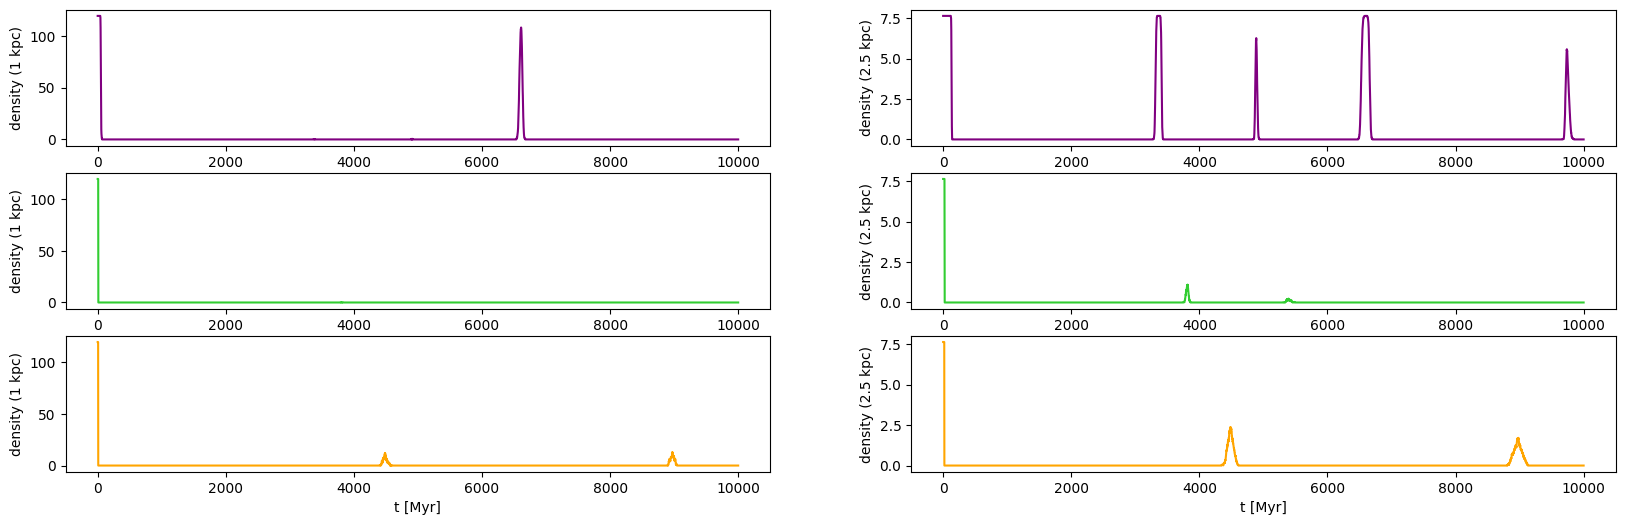

In [62]:
fig, ax = plt.subplots(3,2, figsize=(20,6))

ax[0,0].plot(t_,rho0_1, c='purple')
ax[0,0].set_xlabel('t [Myr]')
ax[0,0].set_ylabel('density (1 kpc)')

ax[0,1].plot(t_,rho0_2, c='purple')
ax[0,1].set_xlabel('t [Myr]')
ax[0,1].set_ylabel('density (2.5 kpc)')

ax[1,0].plot(t_,rho1_1, c='limegreen')
ax[1,0].set_xlabel('t [Myr]')
ax[1,0].set_ylabel('density (1 kpc)')

ax[1,1].plot(t_,rho1_2, c='limegreen')
ax[1,1].set_xlabel('t [Myr]')
ax[1,1].set_ylabel('density (2.5 kpc)')

ax[2,0].plot(t_,rho2_1, c='orange')
ax[2,0].set_xlabel('t [Myr]')
ax[2,0].set_ylabel('density (1 kpc)')

ax[2,1].plot(t_,rho2_2, c='orange')
ax[2,1].set_xlabel('t [Myr]')
ax[2,1].set_ylabel('density (2.5 kpc)')

In [63]:
tot_time = (time.time() - tot_start_time)/60
print('TOTAL RUNNING TIME',+tot_time,'  MINUTOS')

TOTAL RUNNING TIME 17.932749462127685   MINUTOS
